In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from timeit import default_timer as timer 
from tqdm.auto import tqdm

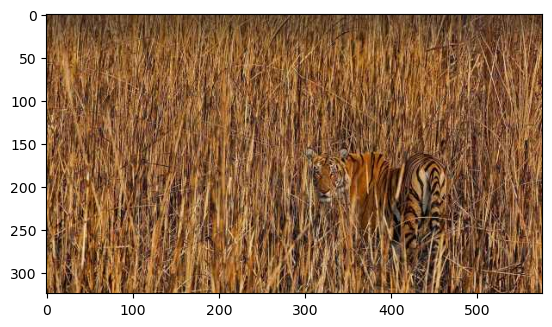

In [2]:
image = torchvision.io.read_image('tiger.jpg')
grid = torchvision.utils.make_grid(image)

plt.imshow(grid.permute(1, 2, 0))
plt.show()

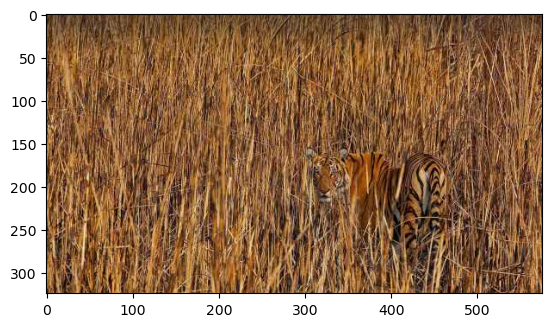

In [3]:
image = Image.open('tiger.jpg')
image_array = np.array(image)

plt.imshow(image_array)
plt.show()

# Talking business

In [4]:

plt.rcParams['figure.figsize'] = (8, 8)

In [5]:
images = torch.rand(10, 1, 28, 28)

## Build 6 conv. filters

In [6]:
conv_filters = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(3, 3), stride=1, padding=1)

## Convolve the image with the filters

In [7]:
output_feature = conv_filters(images)
print(output_feature.shape)

torch.Size([10, 6, 28, 28])


In [8]:
# Load an image file into a PyTorch tensor
image = torchvision.io.read_image('tiger.jpg').float()

# Normalize the pixel values to be between 0 and 1
image /= 255.0

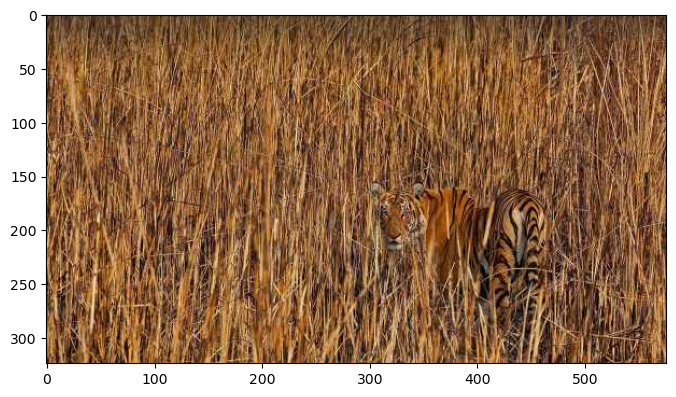

In [9]:
# Define a convolutional filter with 3 input channels, 10 output channels, and a kernel size of 3
conv_filter = nn.Conv2d(3, 10, kernel_size=3)
grid = torchvision.utils.make_grid(image)
plt.imshow(grid.permute(1, 2, 0))
plt.show()

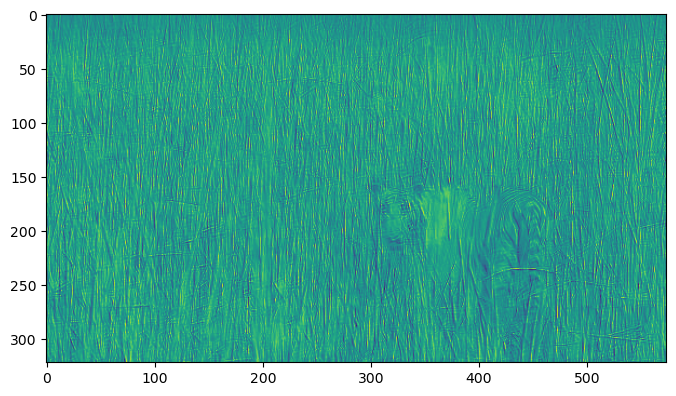

In [10]:
output = conv_filter(image.unsqueeze(0))
# Create a grid of images
output = output.detach()
grid = torchvision.utils.make_grid(output[0][0])
# Display the grid using matplotlib
plt.imshow(output[0][0]) # One 0 is the batch and one is the signal (RGB)
plt.show()

#This is just 1 random filter

In [11]:
print(output.shape)
print(output.shape[1])

torch.Size([1, 10, 322, 574])
10


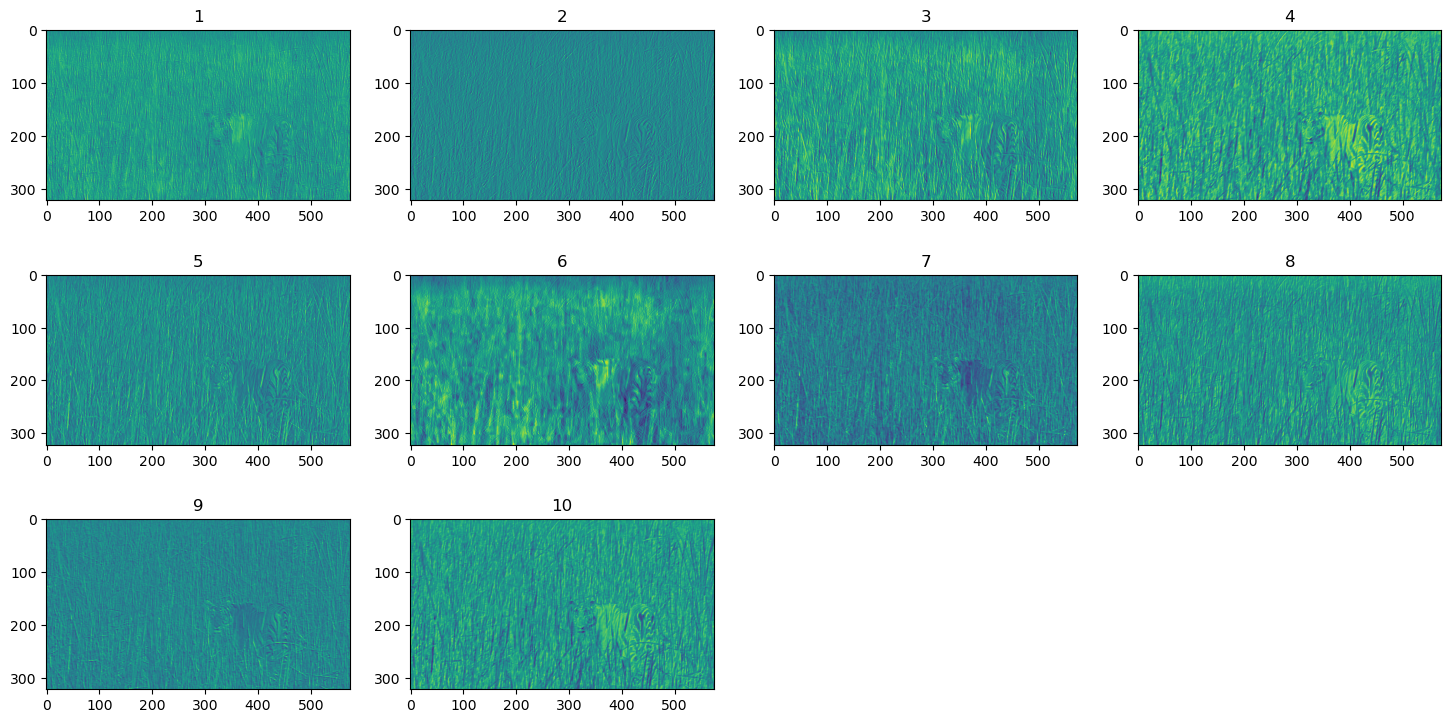

In [12]:
plt.figure(figsize=(18, 9))
for j in range(output.shape[1]):
    plt.subplot(3, 4, j + 1)
    plt.title(j+1)
    plt.imshow(output[0][j])
plt.show()

# Getting a dataset

## Fashion MNIST

### Training Data

In [13]:
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

### Testing Data

In [14]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [15]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [16]:
image.shape

torch.Size([1, 28, 28])

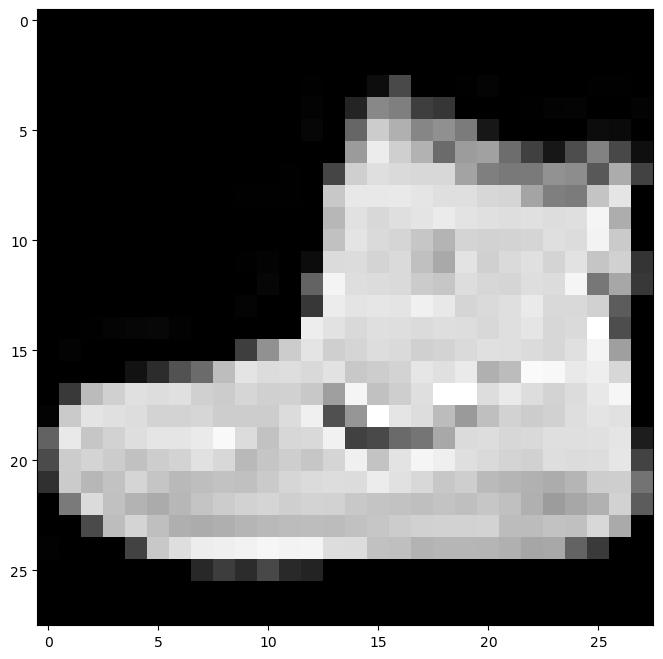

In [17]:
grid = torchvision.utils.make_grid(image)

plt.imshow(grid.permute(1, 2, 0))
plt.show()

In [18]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [19]:
class_names[label]

'Ankle boot'

In [20]:
print(len(test_data))

10000


In [21]:
print(len(train_data))

60000


Image shape: torch.Size([1, 28, 28])


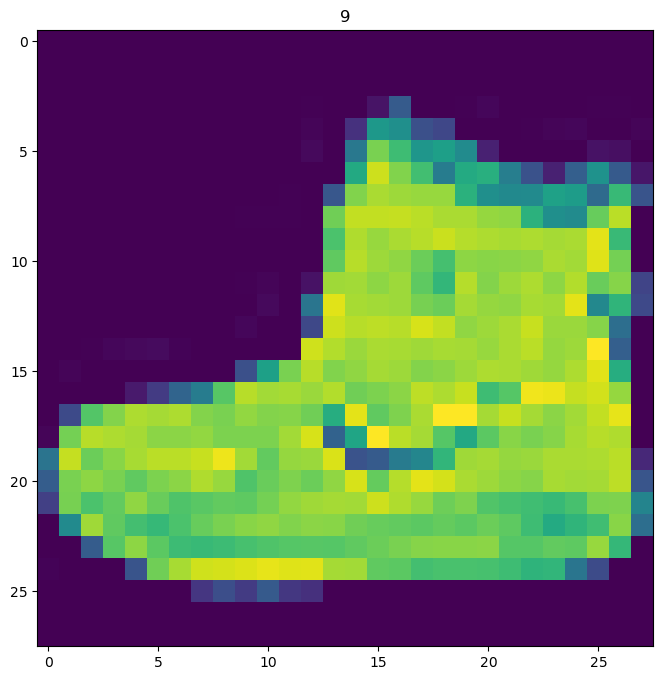

In [22]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

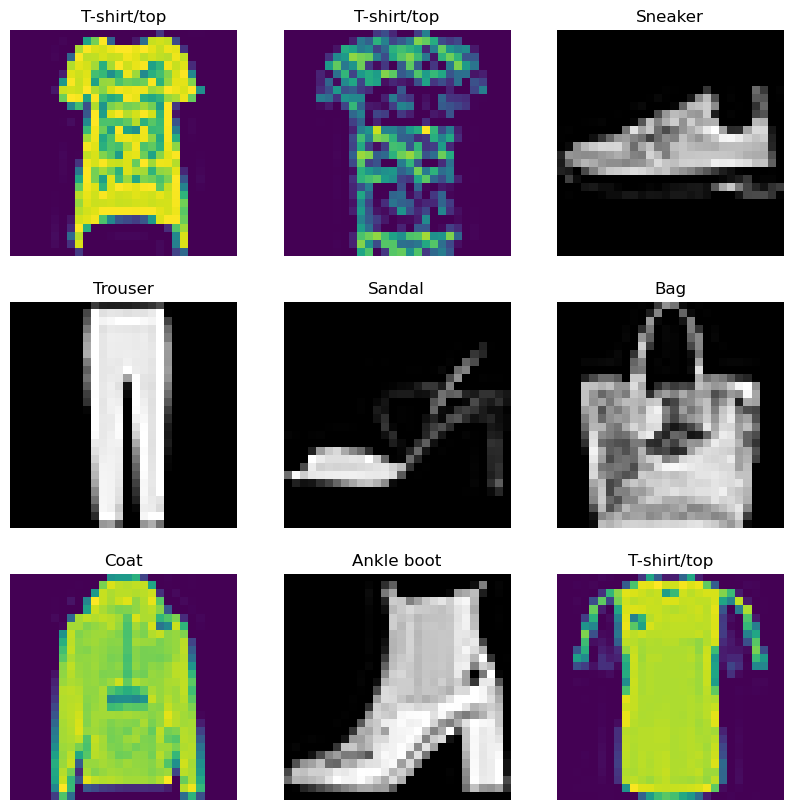

In [23]:
plt.figure(figsize=(10, 10))
for i in range(9):
    index = np.random.randint(len(train_data))
    image,label = train_data[index]
    label = class_names[label]
    plt.subplot(3,3,i + 1)
    if np.random.randint(2):
        plt.imshow(image.squeeze())
    else:
        grid = torchvision.utils.make_grid(image)
        plt.imshow(grid.permute(1, 2, 0))
    plt.title(label)
    plt.axis(False);
plt.show()

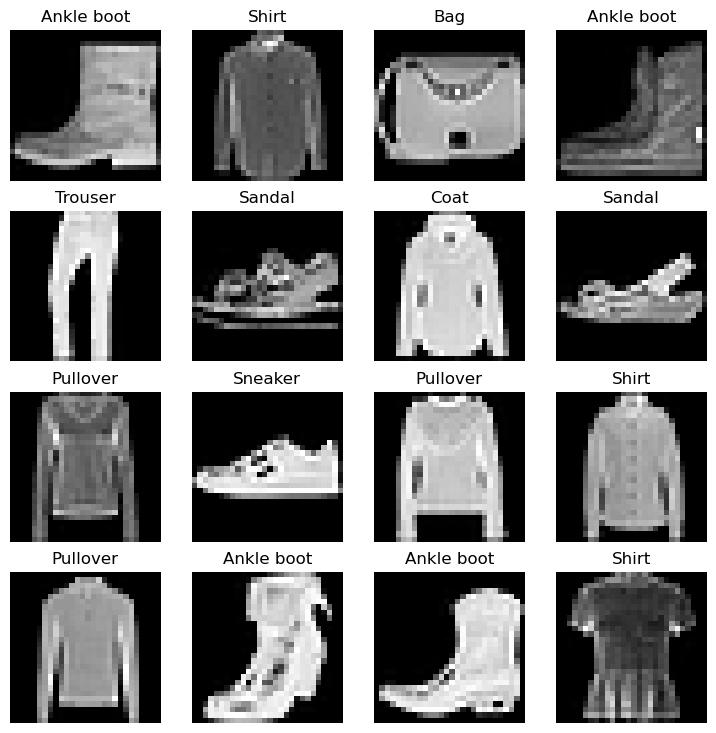

In [24]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img,label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

# Getting a dataset

# Getting a data loader

In [25]:

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000025766086C50>, <torch.utils.data.dataloader.DataLoader object at 0x00000257655437D0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


# Dumb model !!!

In [26]:
# Check out what's inside the training dataloader
# This is how we get some random samples
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [27]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.Linear(hidden_units, output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x)

In [28]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=28 ** 2, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hiden layer
    output_shape=len(class_names) # one for every class
)


In [29]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [30]:
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.2)
loss = torch.nn.CrossEntropyLoss()

In [31]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.2
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [32]:
loss

CrossEntropyLoss()

In [33]:
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device if device is not None else 'cpu'}: {total_time:.3f} seconds")
    return total_time

In [34]:
# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
EPOCH_COUNT = 10

# Create training and testing loop
for epoch in tqdm(range(EPOCH_COUNT)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train() 
        # 1. Forward pass
        y_pred = model_0(X)
        # 2. Calculate loss (per batch)
        loss_per_current_batch = loss(y_pred, y.long())
        train_loss += loss_per_current_batch
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        # 4. Loss backward
        loss_per_current_batch.backward()
        # 5. Optimizer step
        optimizer.step()
        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    train_loss /= len(train_dataloader)
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
            
# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.62026 | Test loss: 0.52747, Test acc: 81.61%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.51423 | Test loss: 0.50532, Test acc: 82.49%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.54748 | Test loss: 0.51912, Test acc: 82.59%

Epoch: 3
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.48321 | Test loss: 0.50339, Test acc: 82.69%

Epoch: 4
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
L

In [35]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=torch.nn.CrossEntropyLoss(), accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5003529787063599,
 'model_acc': 82.25838658146965}

In [36]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_shape),
            nn.ReLU())
        
    def forward(self, x):
        return self.layer_stack(x)

In [37]:
model_1 = FashionMNISTModelV1(input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
)

In [38]:
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.2)
loss = torch.nn.CrossEntropyLoss()

In [39]:
torch.manual_seed(42)
train_time_start_on_cpu = timer()
for epoch in tqdm(range(EPOCH_COUNT)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_1.train()
        y_pred = model_1(X)
        loss_per_current_batch = loss(y_pred, y.long())
        train_loss += loss_per_current_batch
        optimizer.zero_grad()
        loss_per_current_batch.backward()
        optimizer.step()
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    train_loss /= len(train_dataloader)
    ### Testing

    test_loss, test_acc = 0, 0 
    model_1.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_1(X)
            test_loss += loss(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
            
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.95795 | Test loss: 0.84464, Test acc: 70.15%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.74503 | Test loss: 0.73428, Test acc: 72.78%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.70101 | Test loss: 0.77079, Test acc: 73.38%

Epoch: 3
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.67421 | Test loss: 0.69263, Test acc: 74.59%

Epoch: 4
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
L

In [40]:
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=torch.nn.CrossEntropyLoss(), accuracy_fn=accuracy_fn
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6646979451179504,
 'model_acc': 75.75878594249201}

# Creating a Convolutional Neural Network

In [41]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [42]:
# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing

In [43]:
# Create a convolutional layer with same dimensions as TinyVGG 
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 
output = conv_layer(test_image.unsqueeze(0)).detach()  # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input)

print(output.shape)
def show(output):
    plt.figure(figsize=(18, 9))
    for j in range(output.shape[1]):
        plt.subplot(3, 4, j + 1)
        plt.title(j+1)
        plt.imshow(output[0][j])
        plt.axis(False);
    plt.show()
    

torch.Size([1, 10, 62, 62])


kernel size = 2, stride = 1, padding = 0


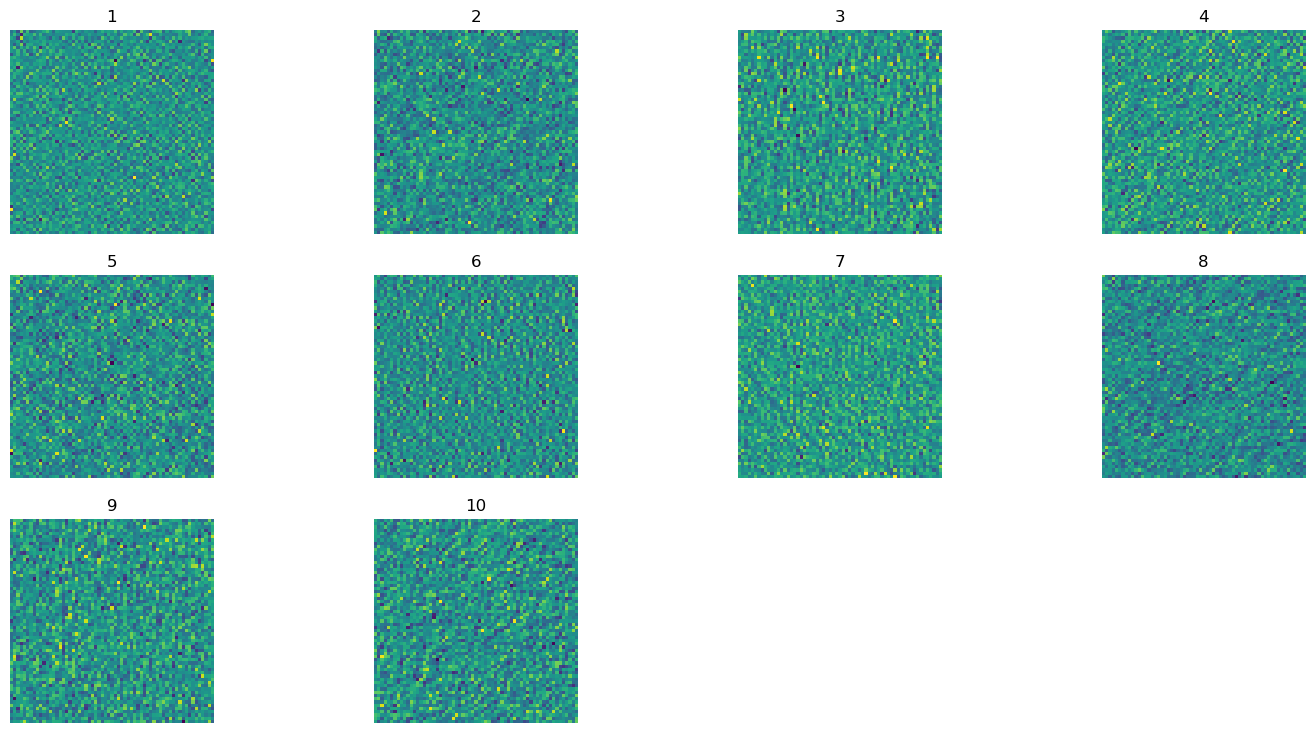

kernel size = 2, stride = 1, padding = 1


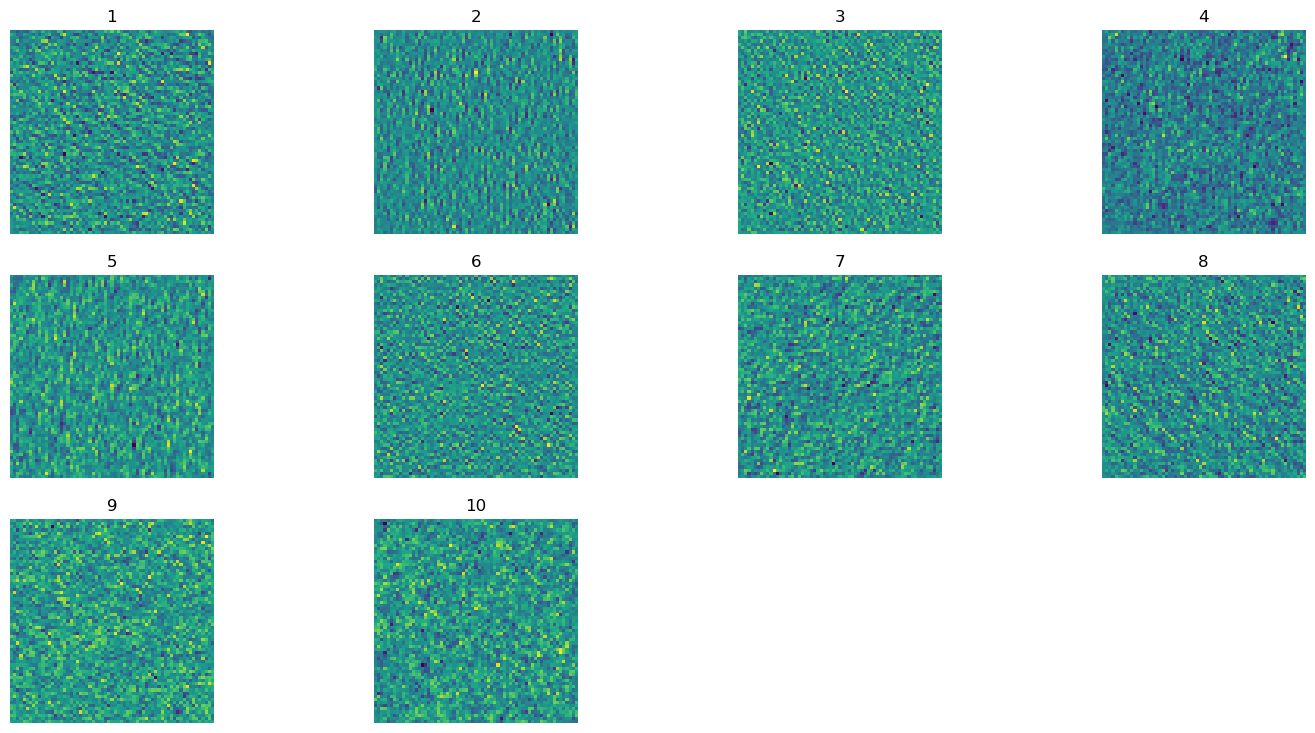

kernel size = 2, stride = 1, padding = 2


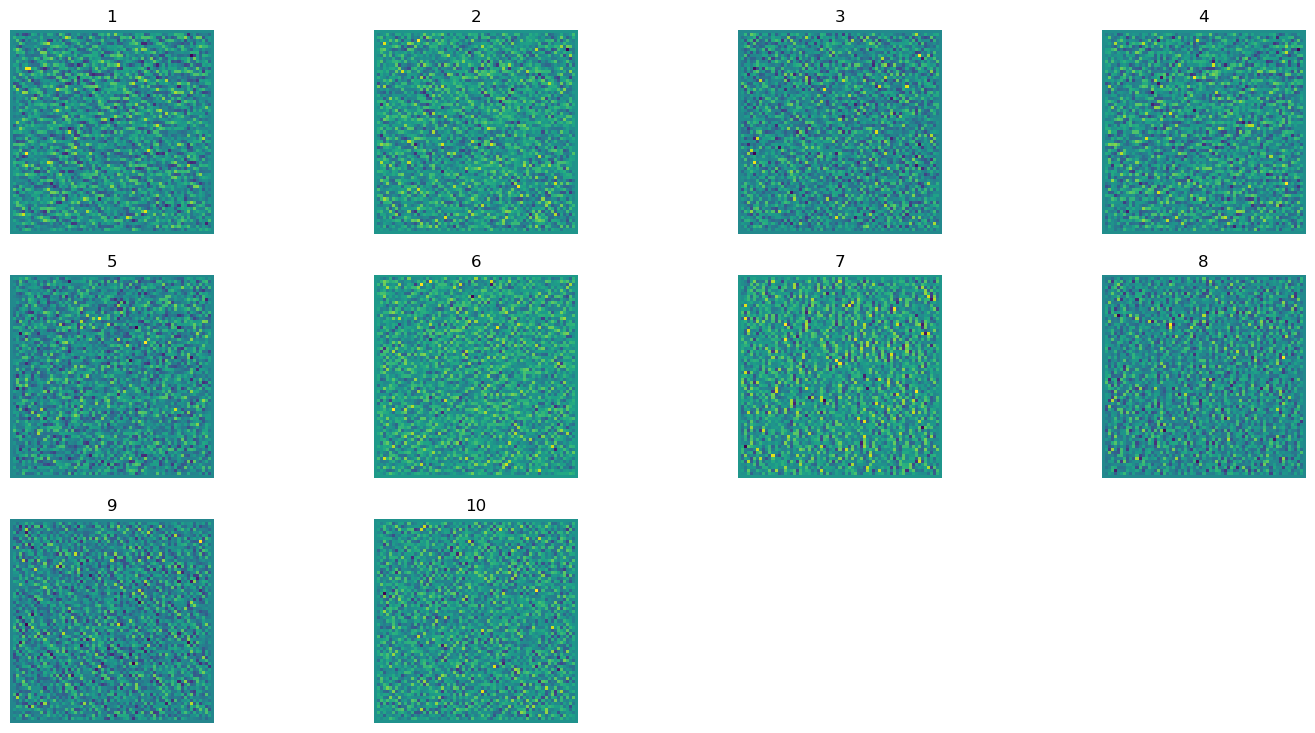

C:\Users\victo\anaconda3\envs\artificial_intelligence\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\Convolution.cpp:1041.)
  return F.conv2d(input, weight, bias, self.stride,


kernel size = 2, stride = 1, padding = same


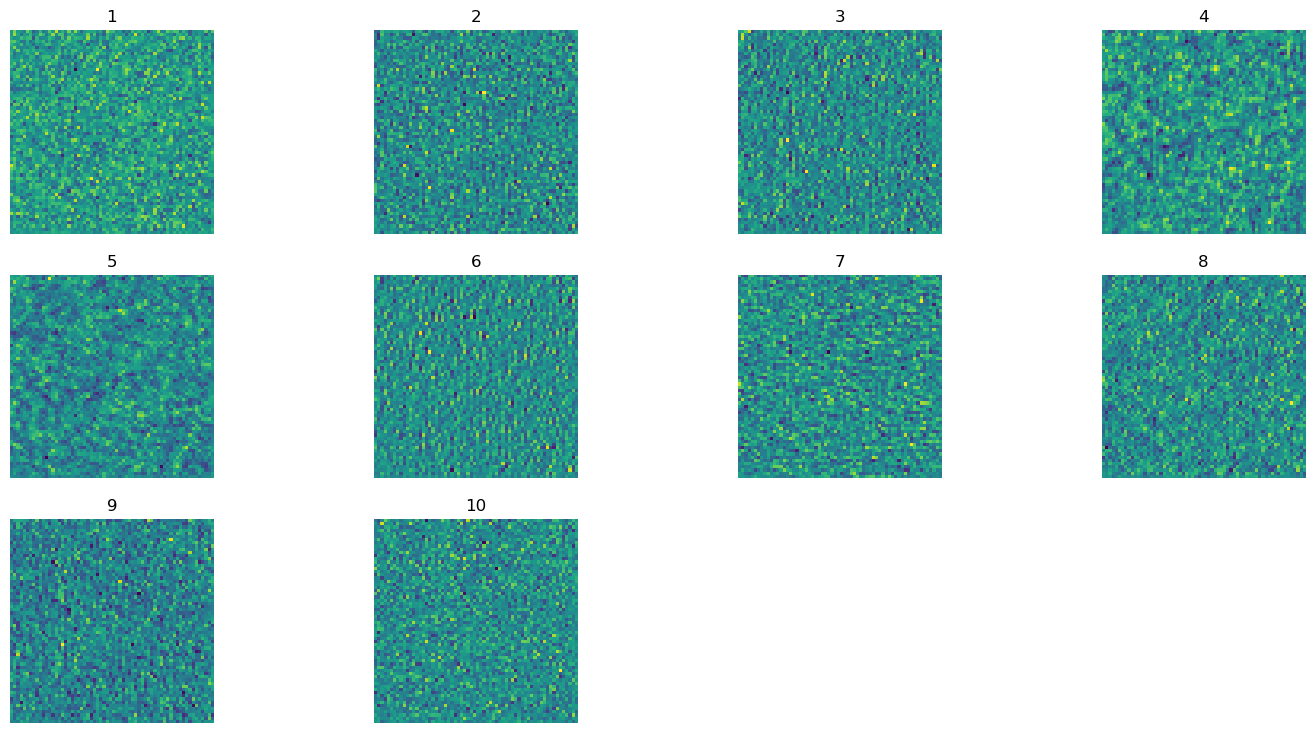

kernel size = 2, stride = 1, padding = valid


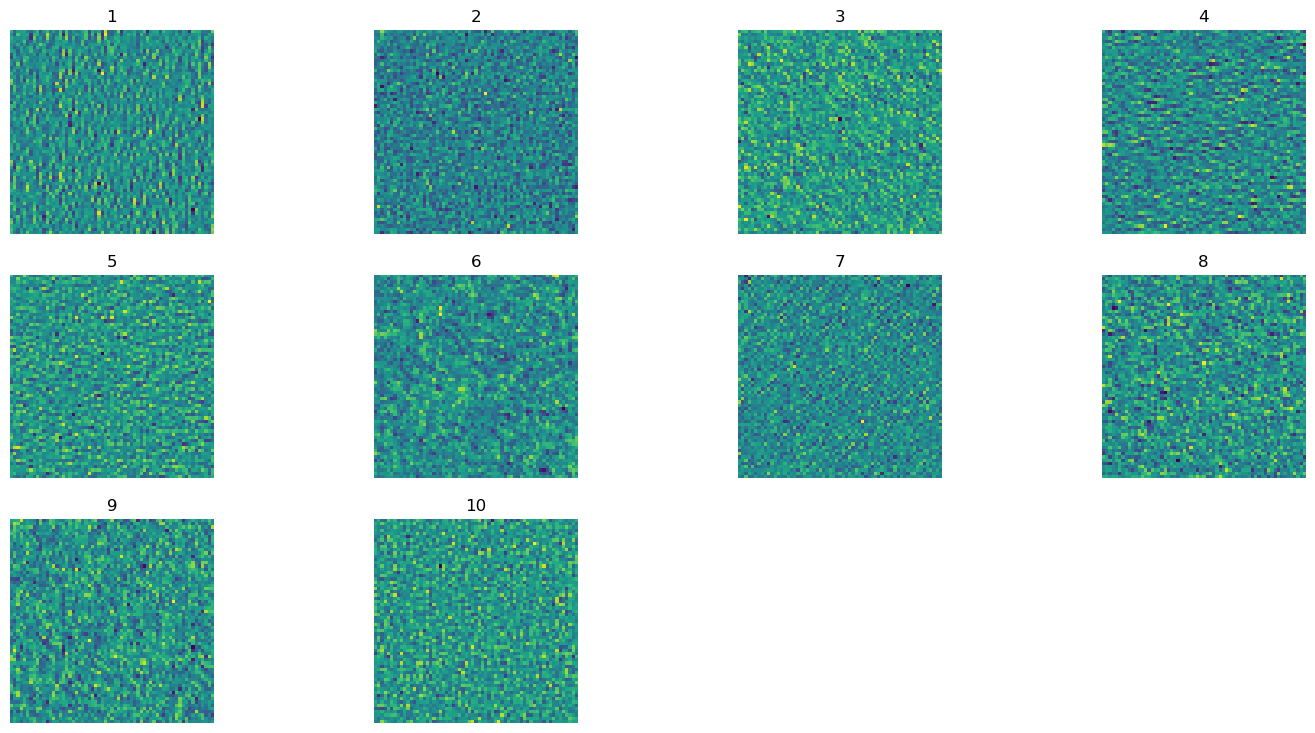

kernel size = 2, stride = 2, padding = 0


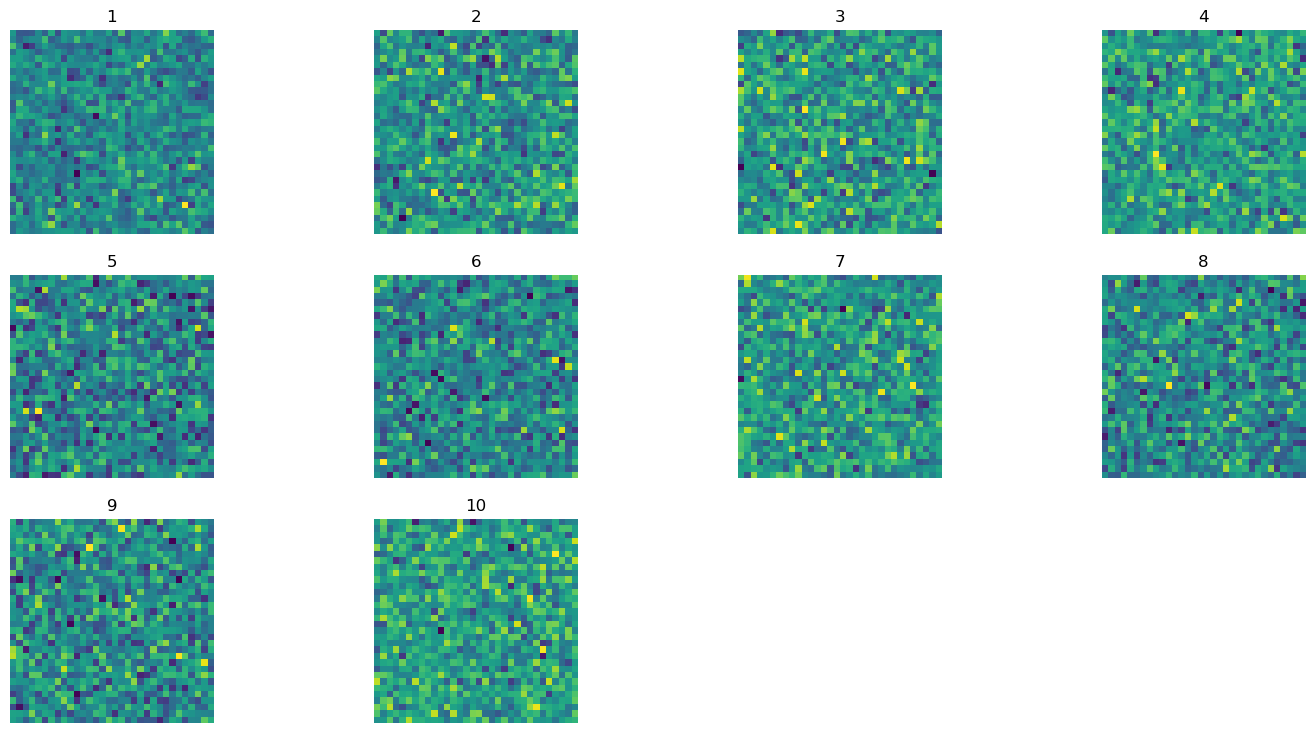

kernel size = 2, stride = 2, padding = 1


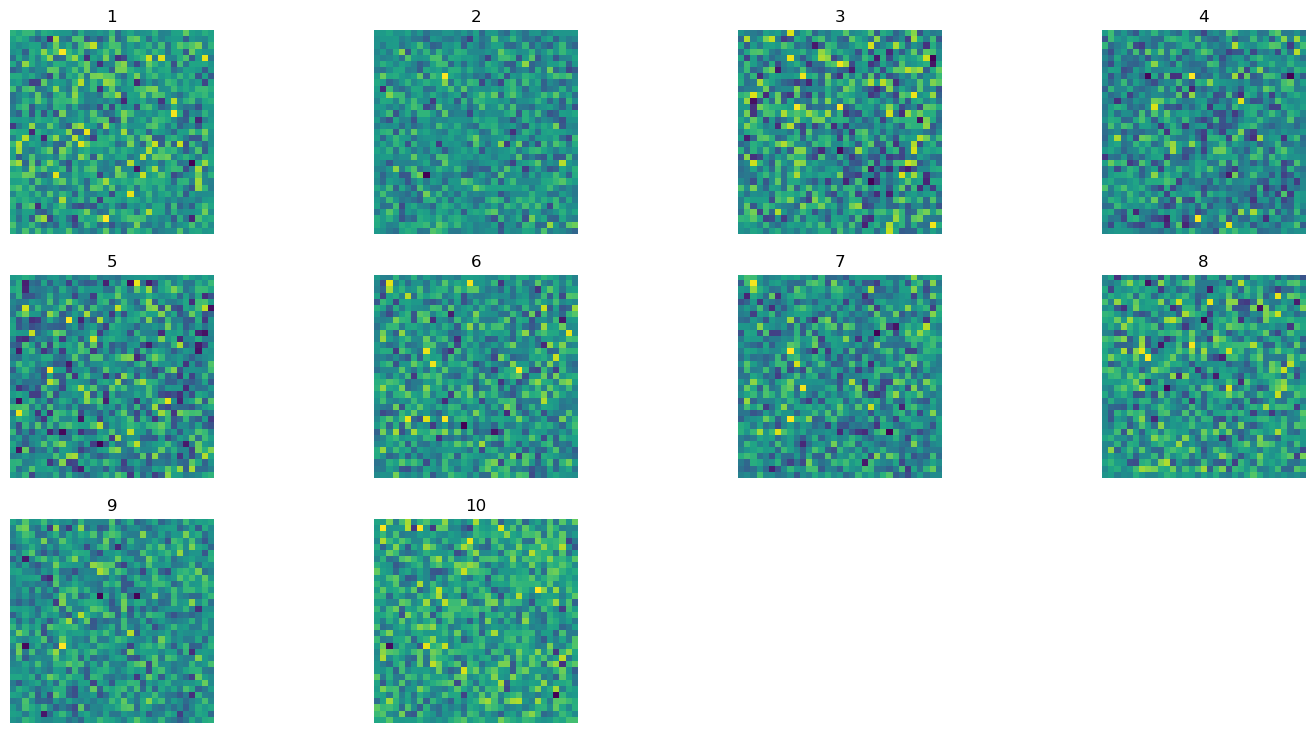

kernel size = 2, stride = 2, padding = 2


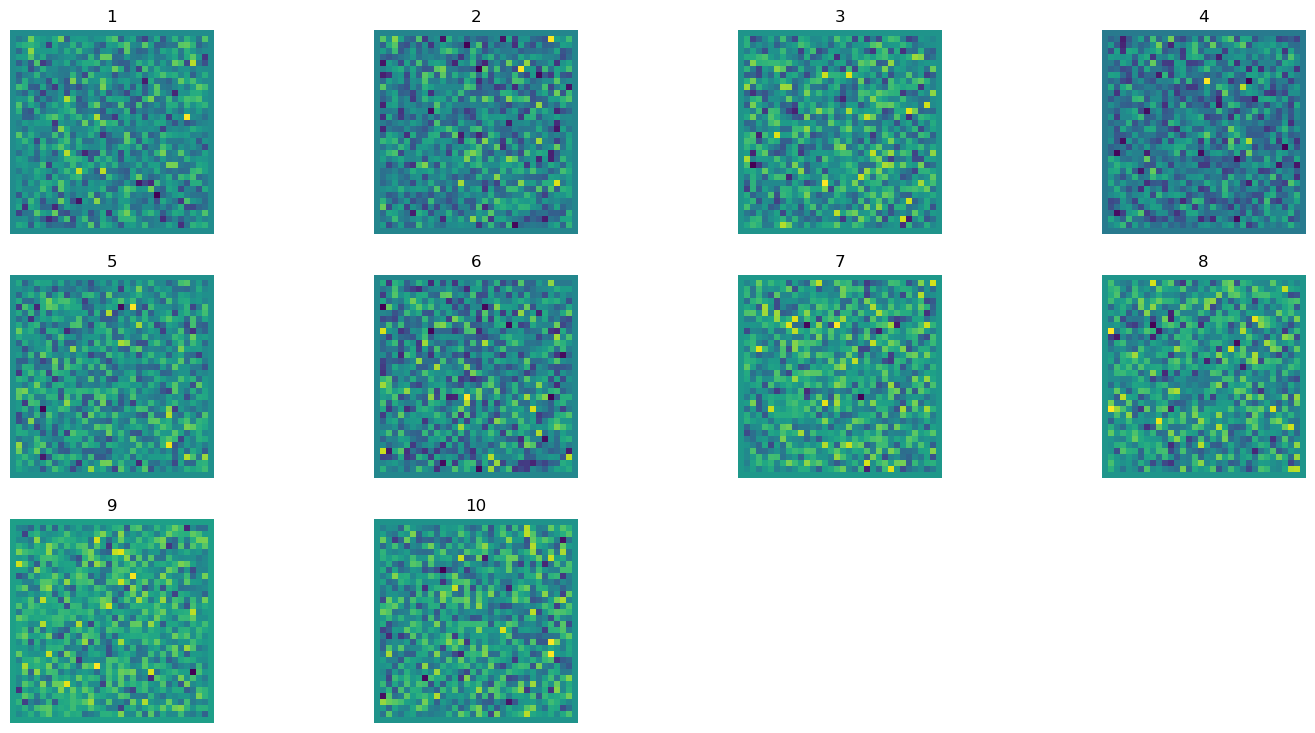

kernel size = 2, stride = 3, padding = 0


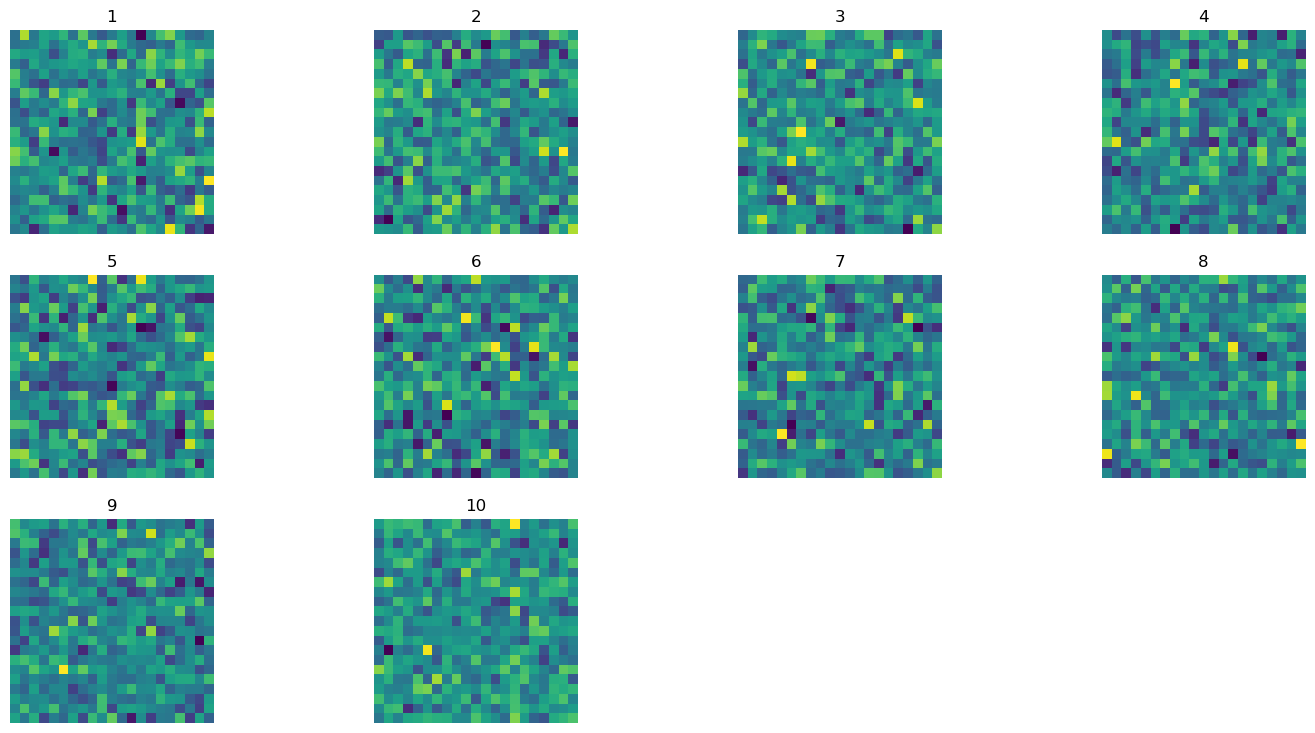

kernel size = 2, stride = 3, padding = 1


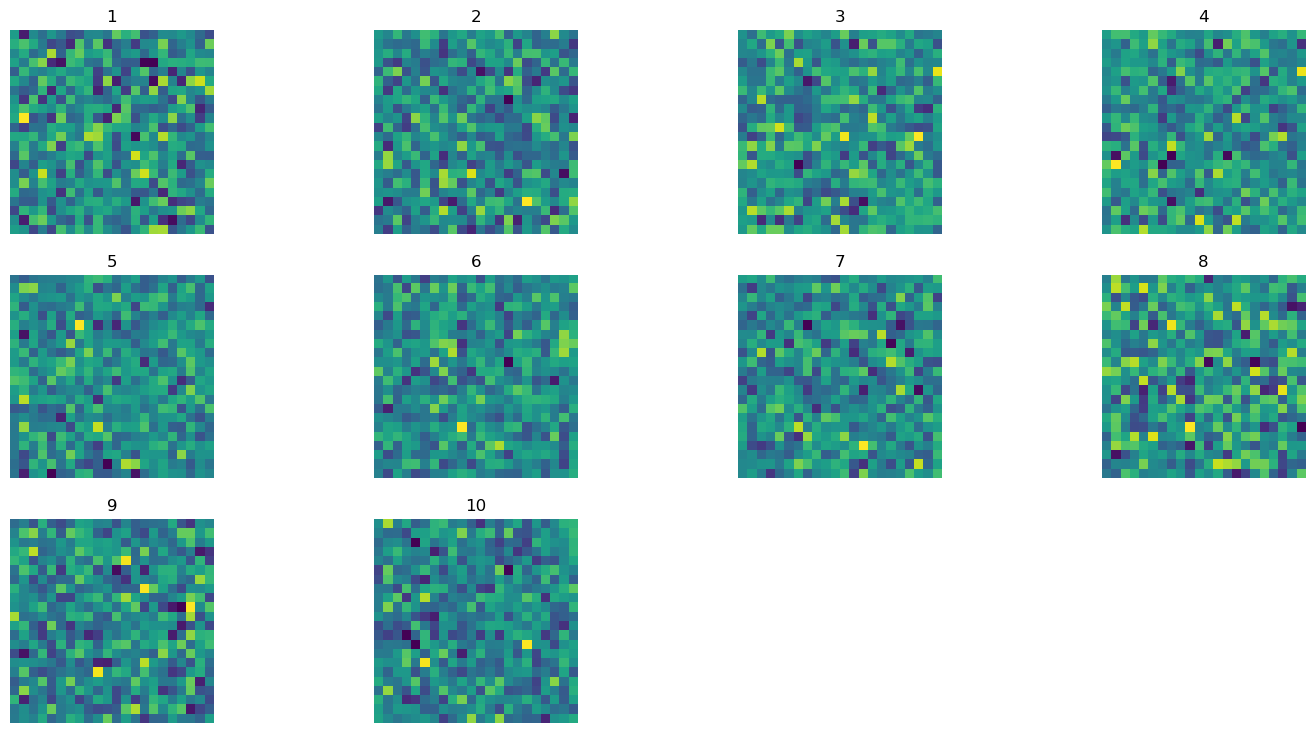

kernel size = 2, stride = 3, padding = 2


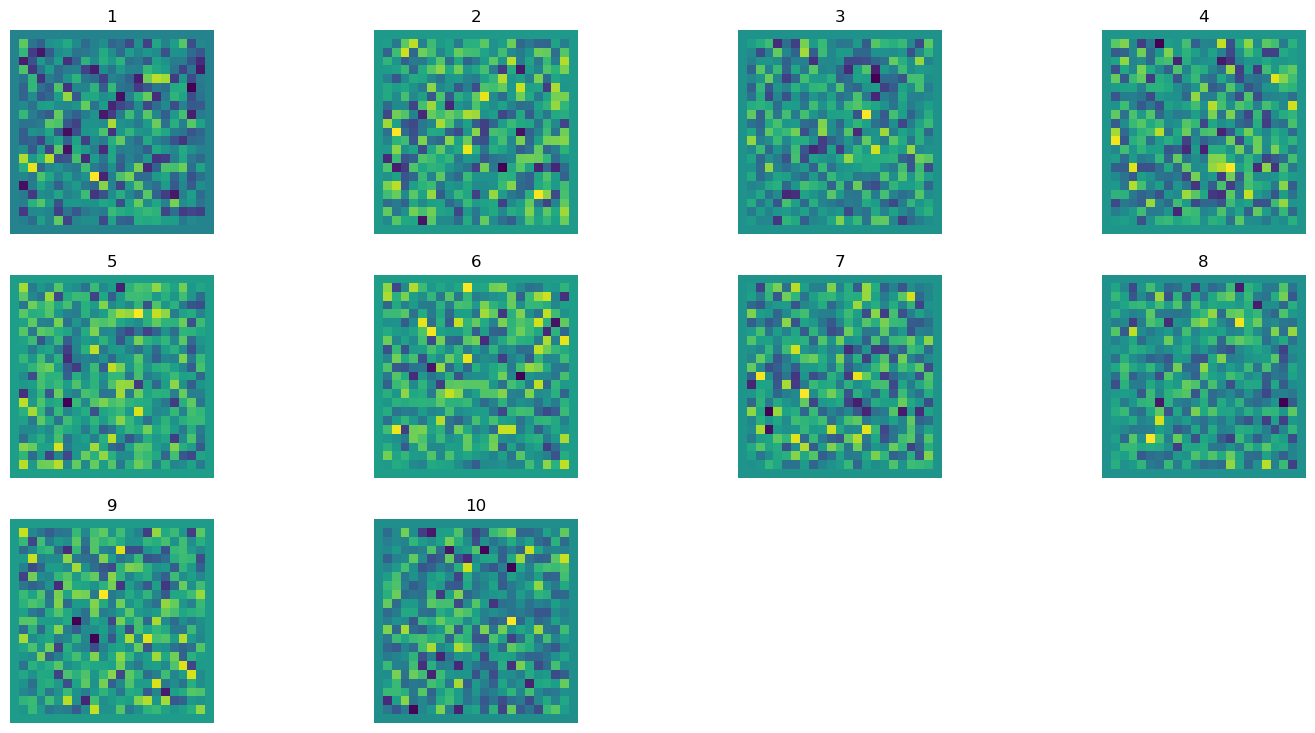

kernel size = 3, stride = 1, padding = 0


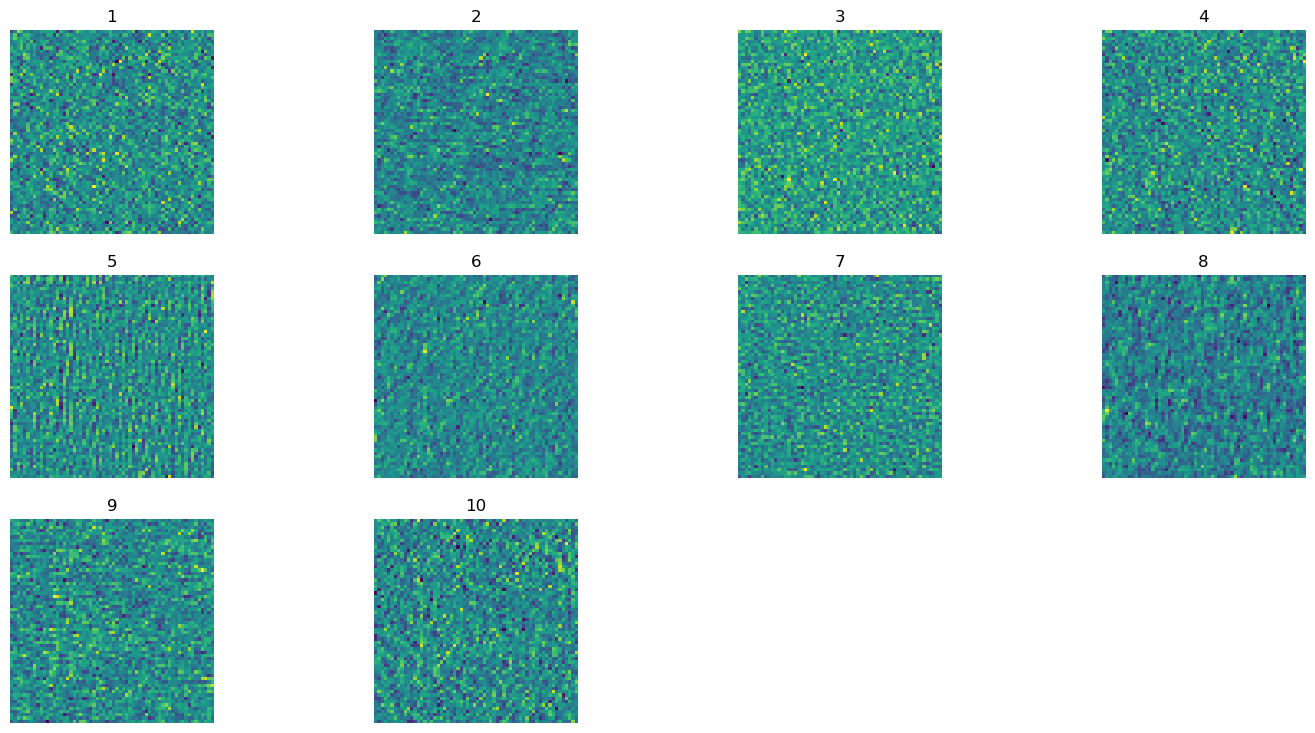

kernel size = 3, stride = 1, padding = 1


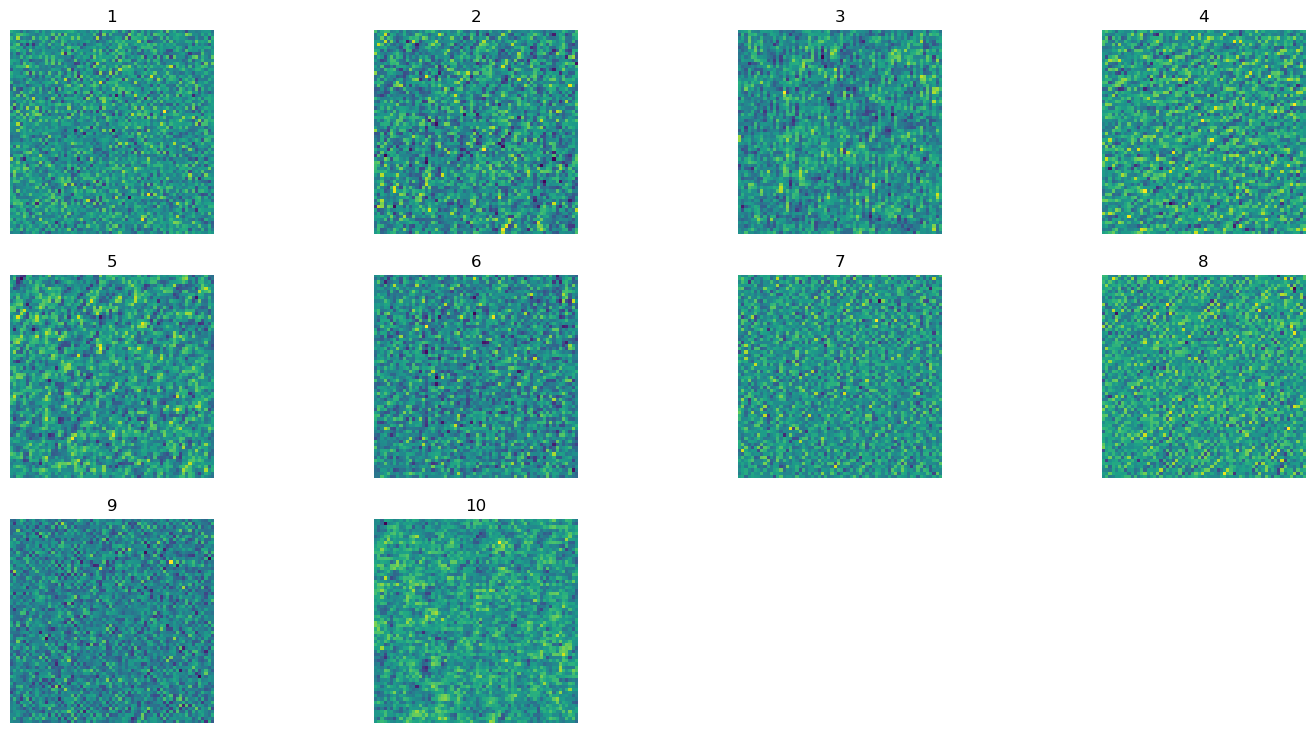

kernel size = 3, stride = 1, padding = 2


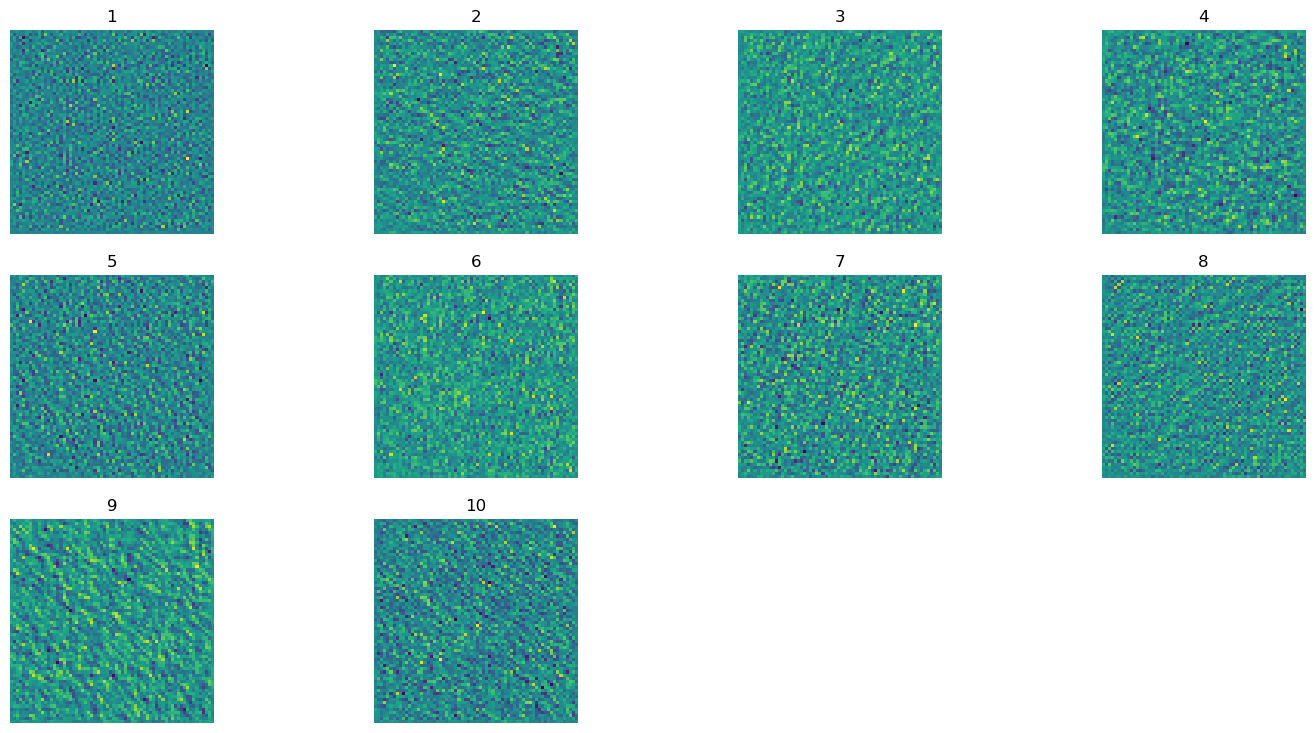

kernel size = 3, stride = 1, padding = same


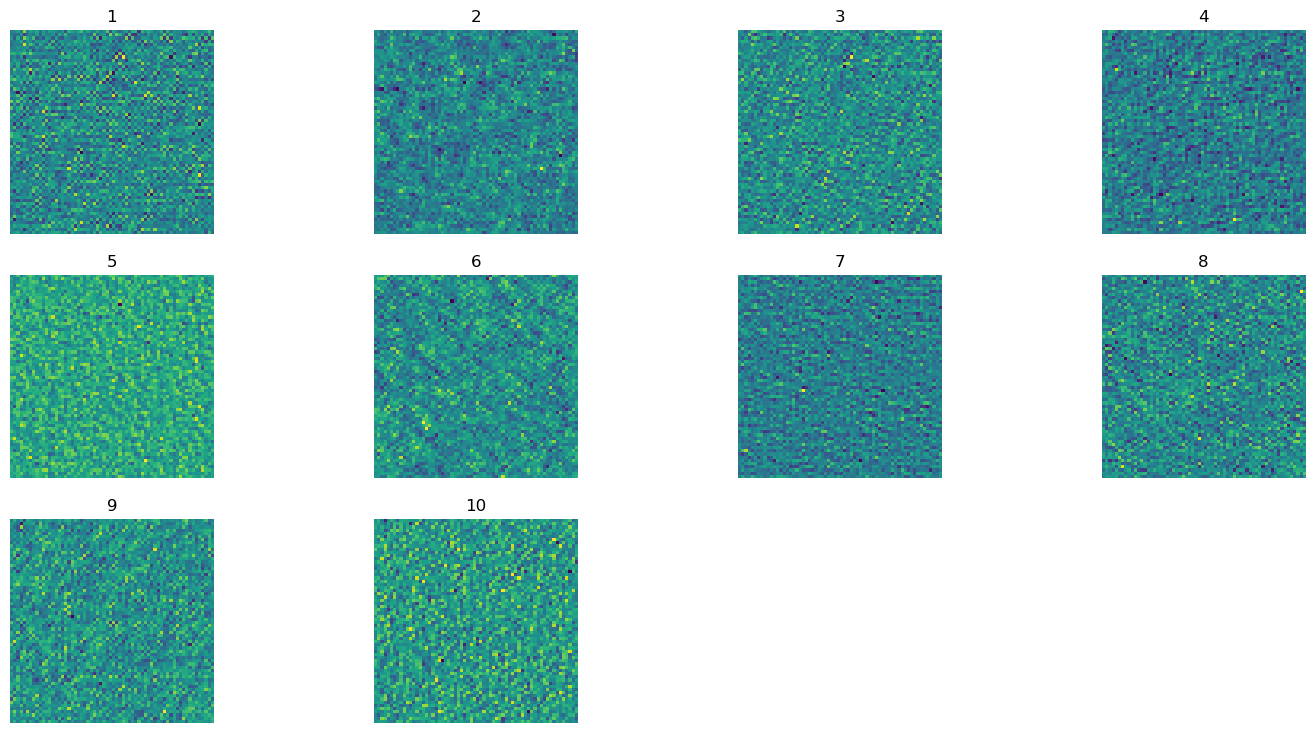

kernel size = 3, stride = 1, padding = valid


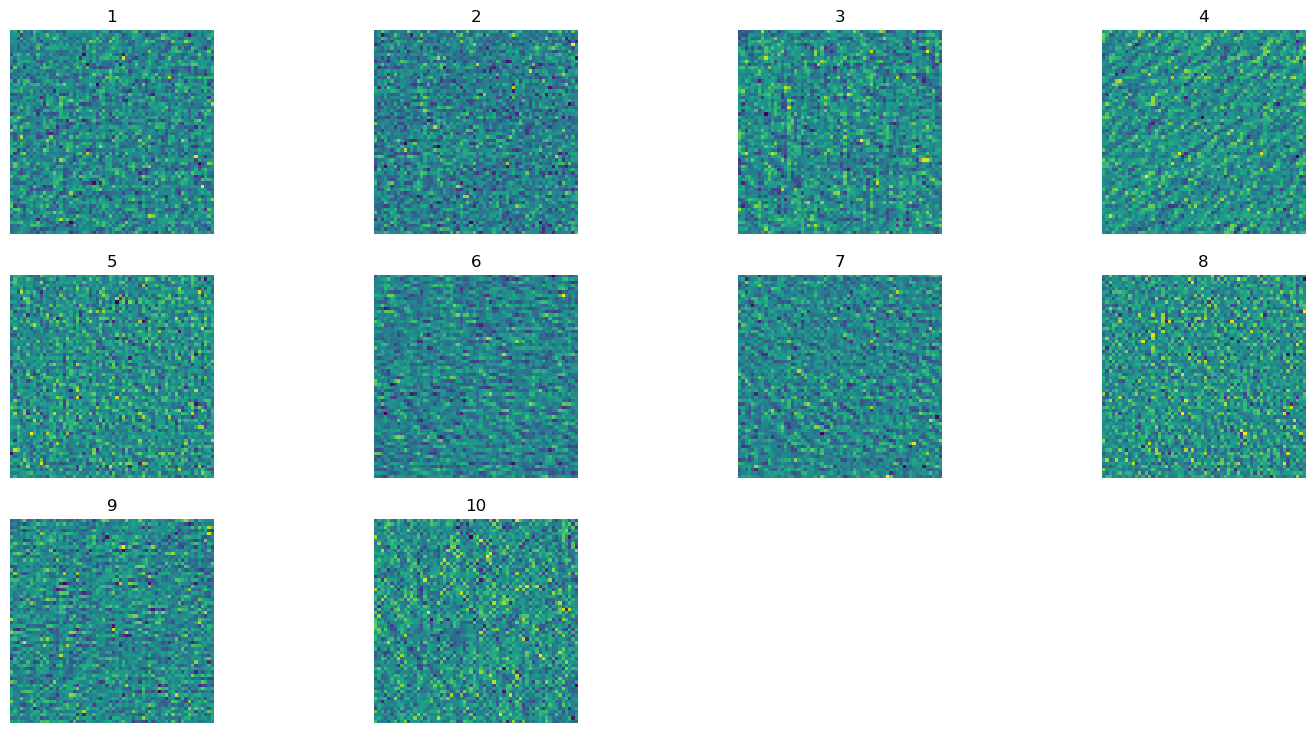

kernel size = 3, stride = 2, padding = 0


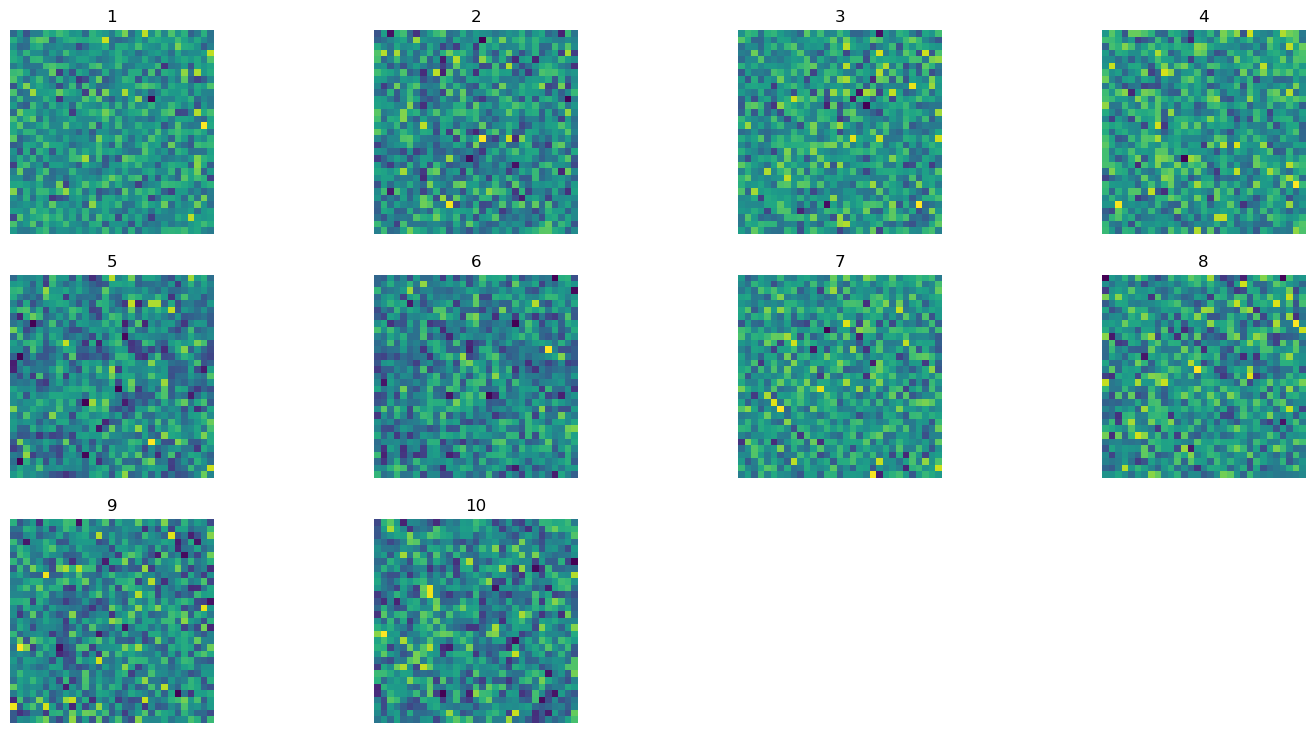

kernel size = 3, stride = 2, padding = 1


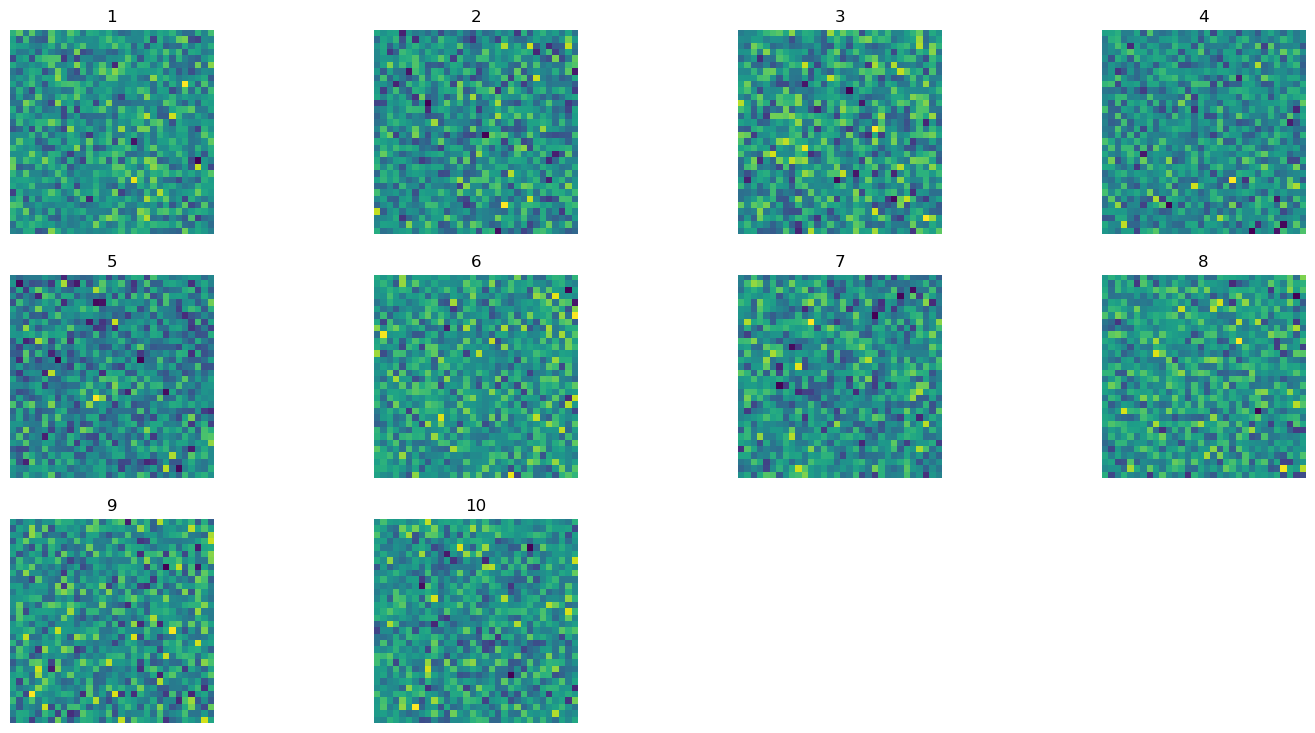

kernel size = 3, stride = 2, padding = 2


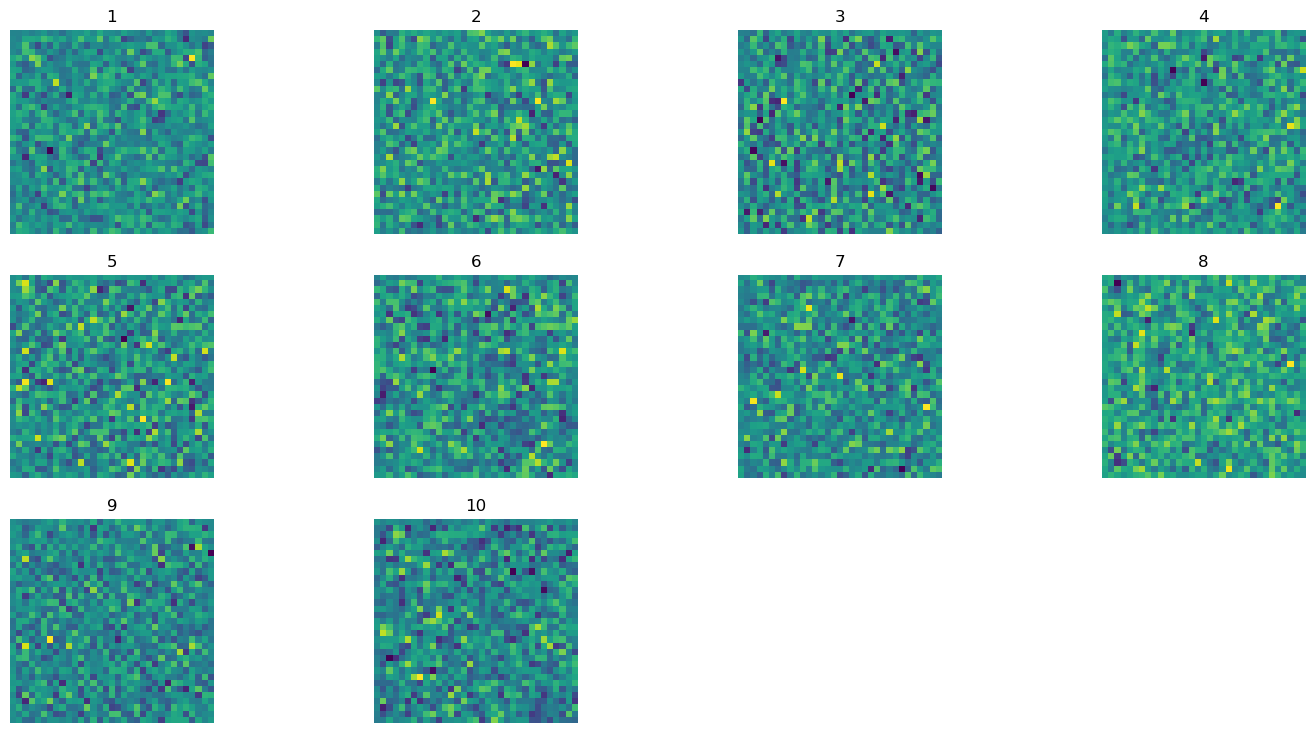

kernel size = 3, stride = 3, padding = 0


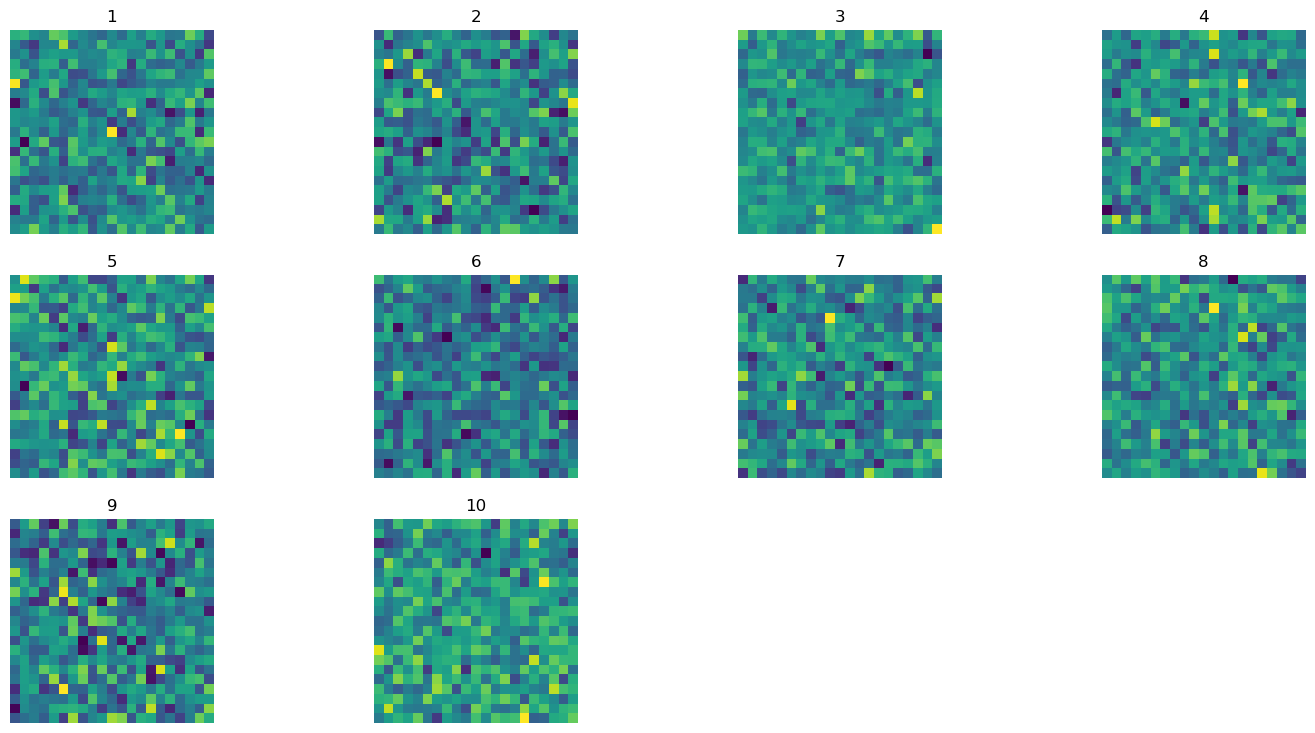

kernel size = 3, stride = 3, padding = 1


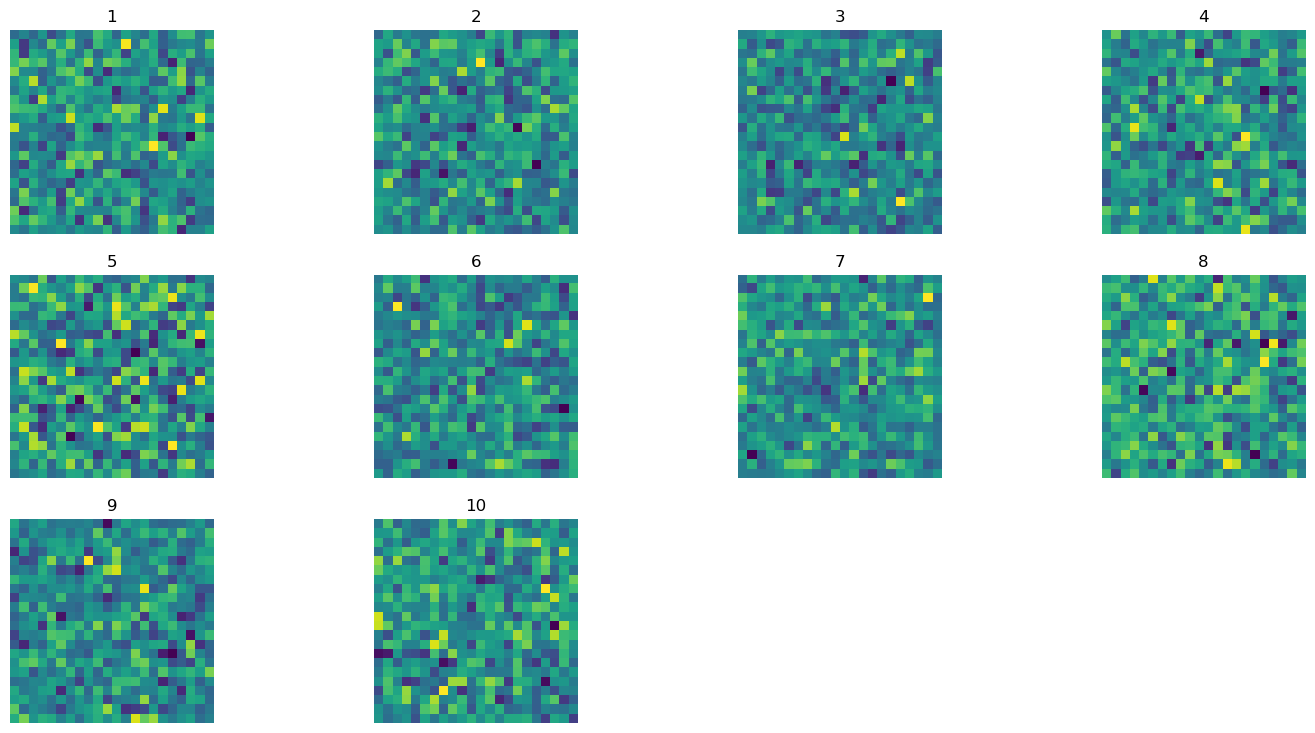

kernel size = 3, stride = 3, padding = 2


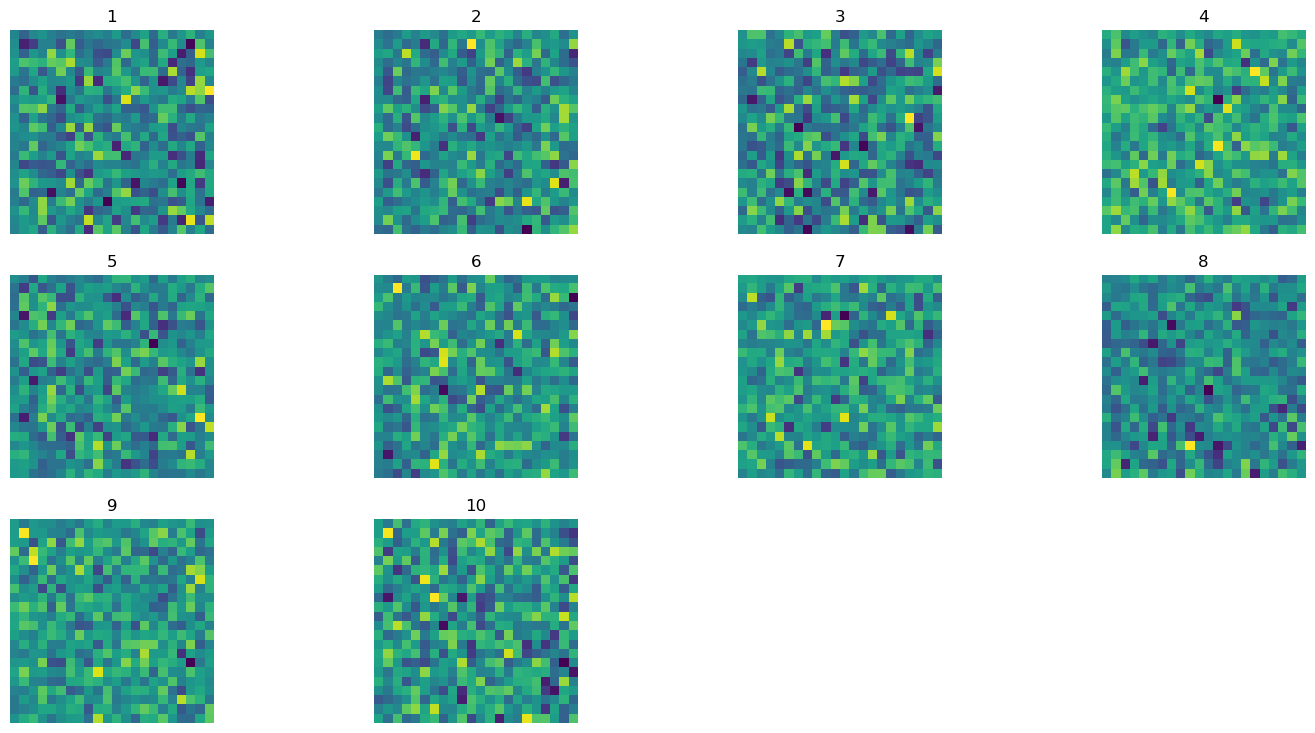

kernel size = 5, stride = 1, padding = 0


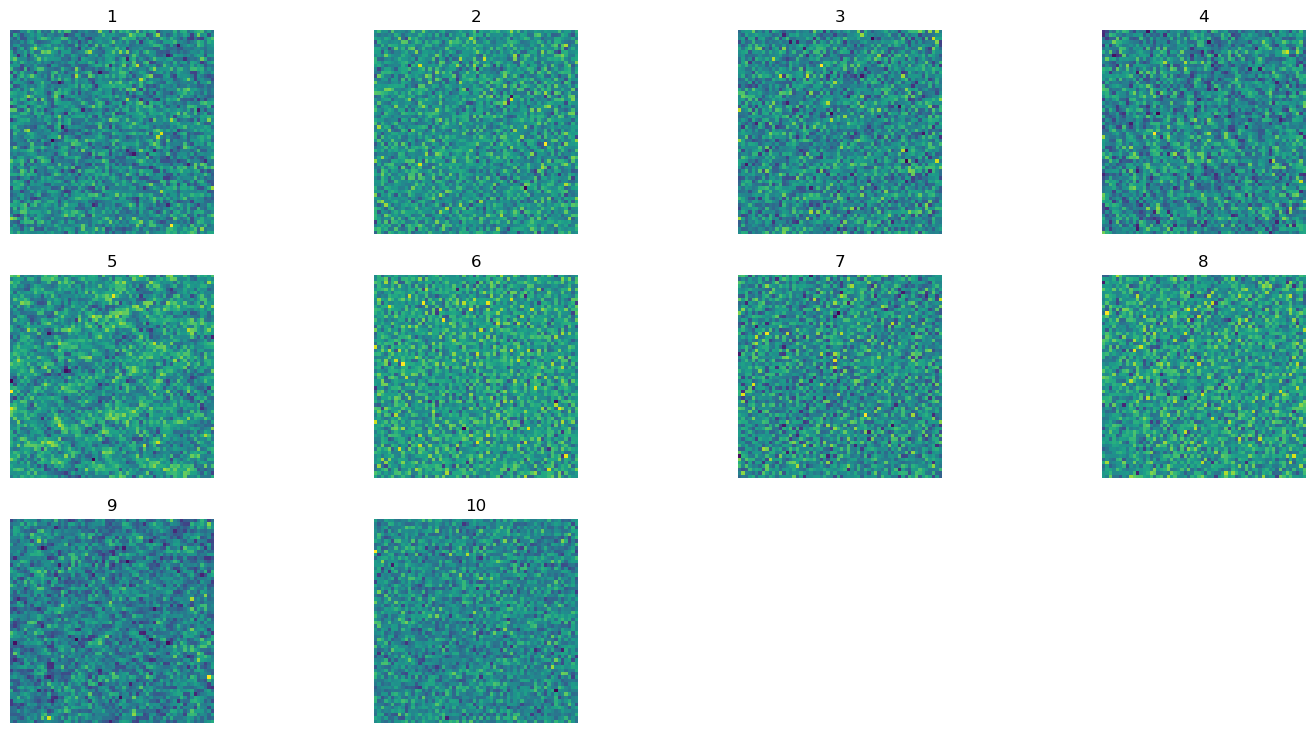

kernel size = 5, stride = 1, padding = 1


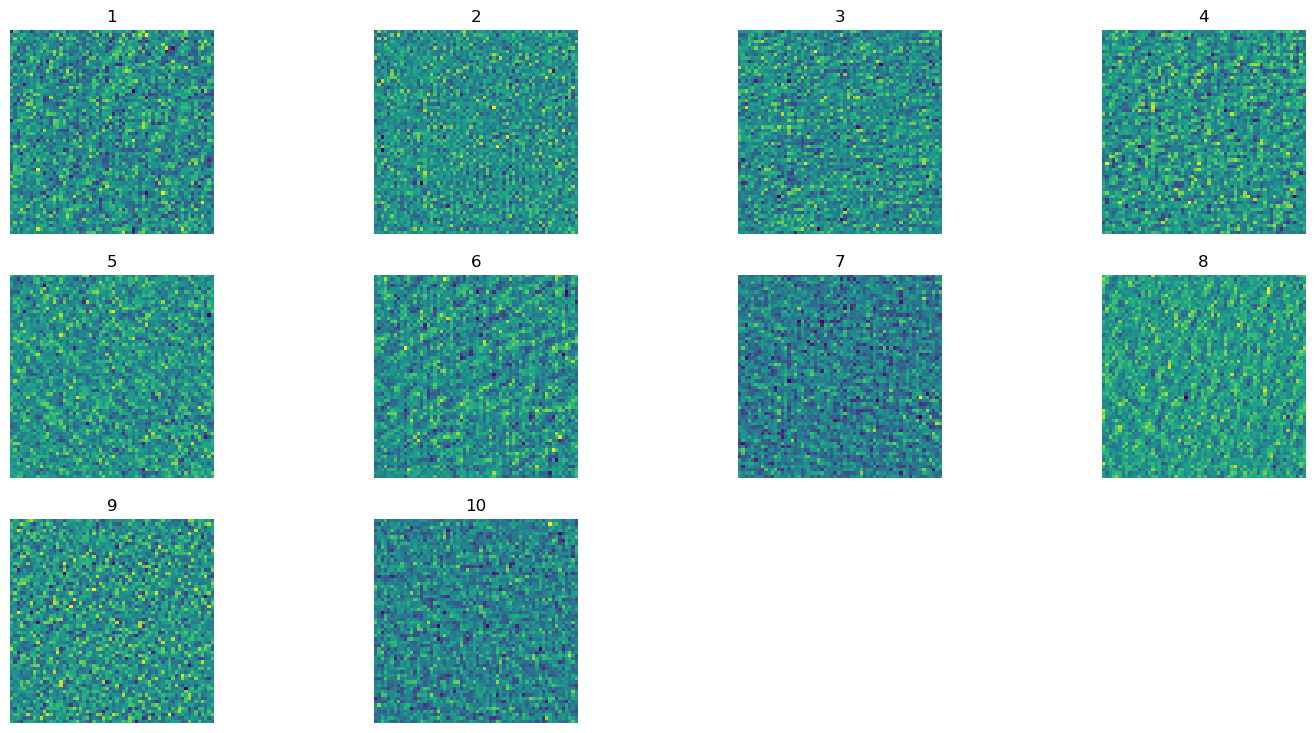

kernel size = 5, stride = 1, padding = 2


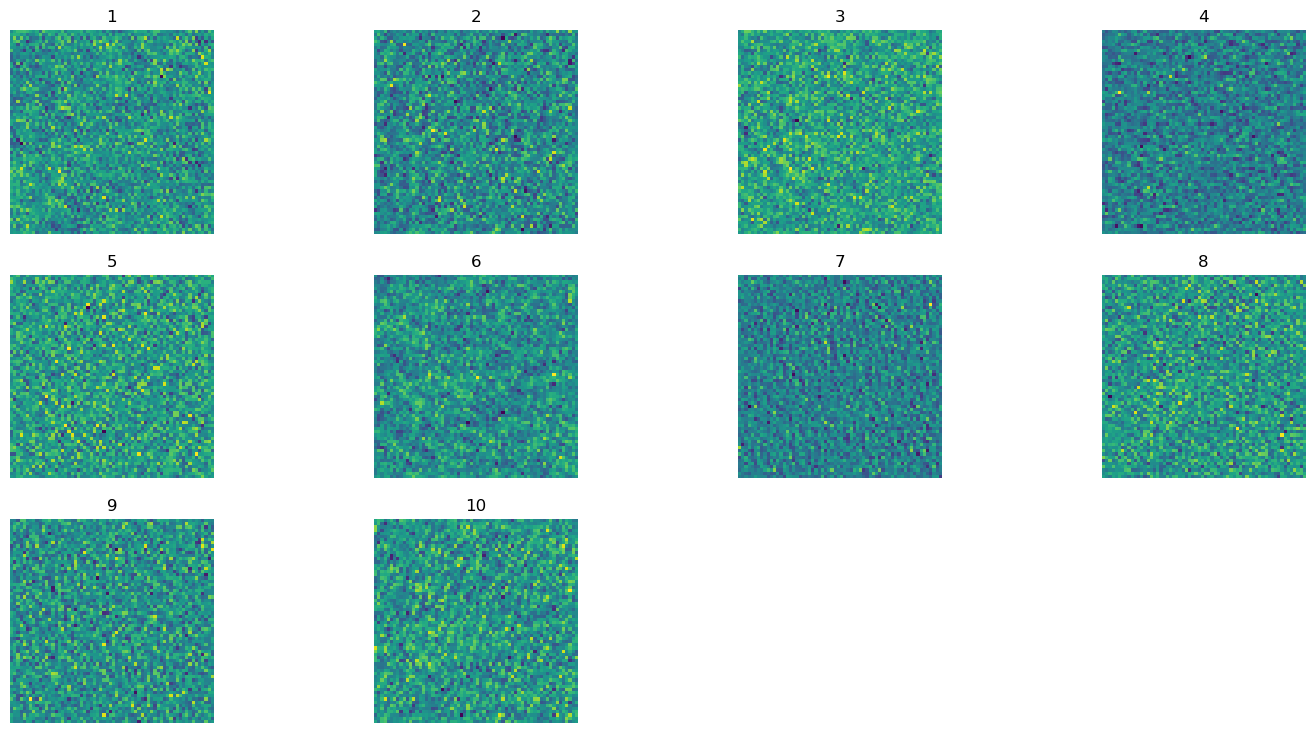

kernel size = 5, stride = 1, padding = same


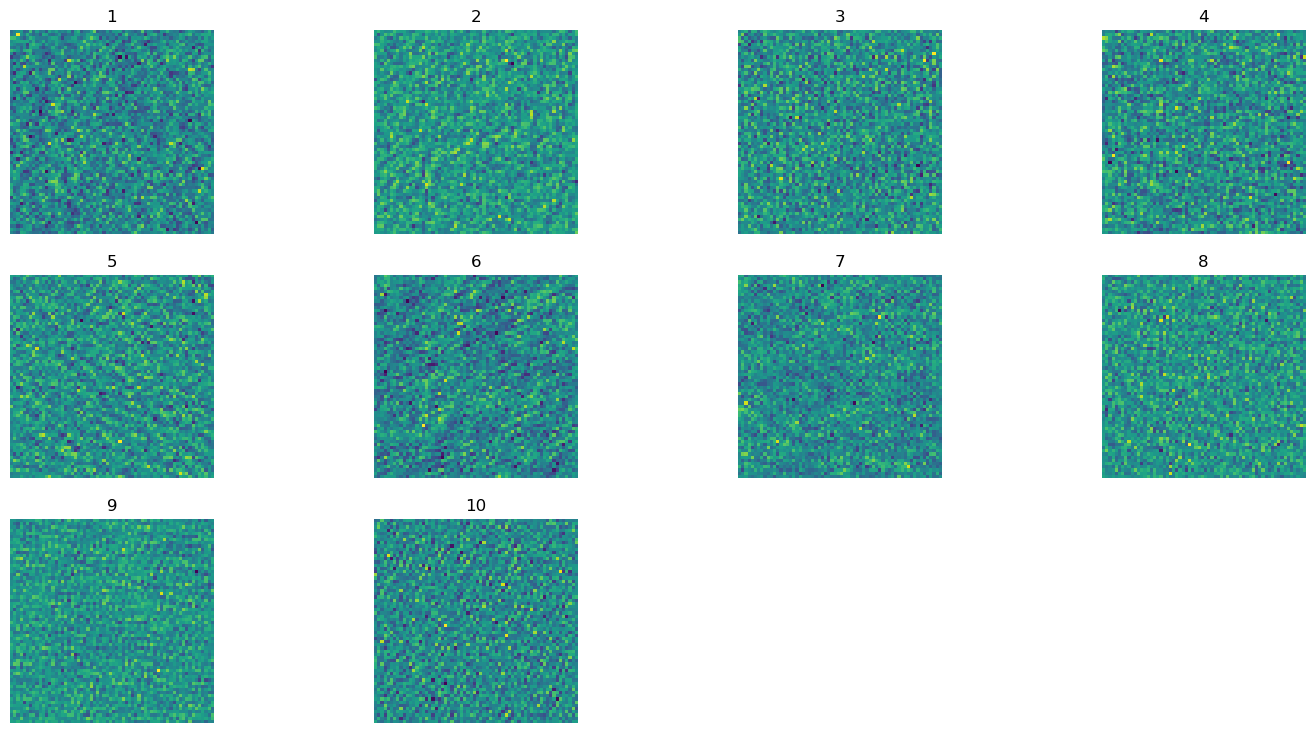

kernel size = 5, stride = 1, padding = valid


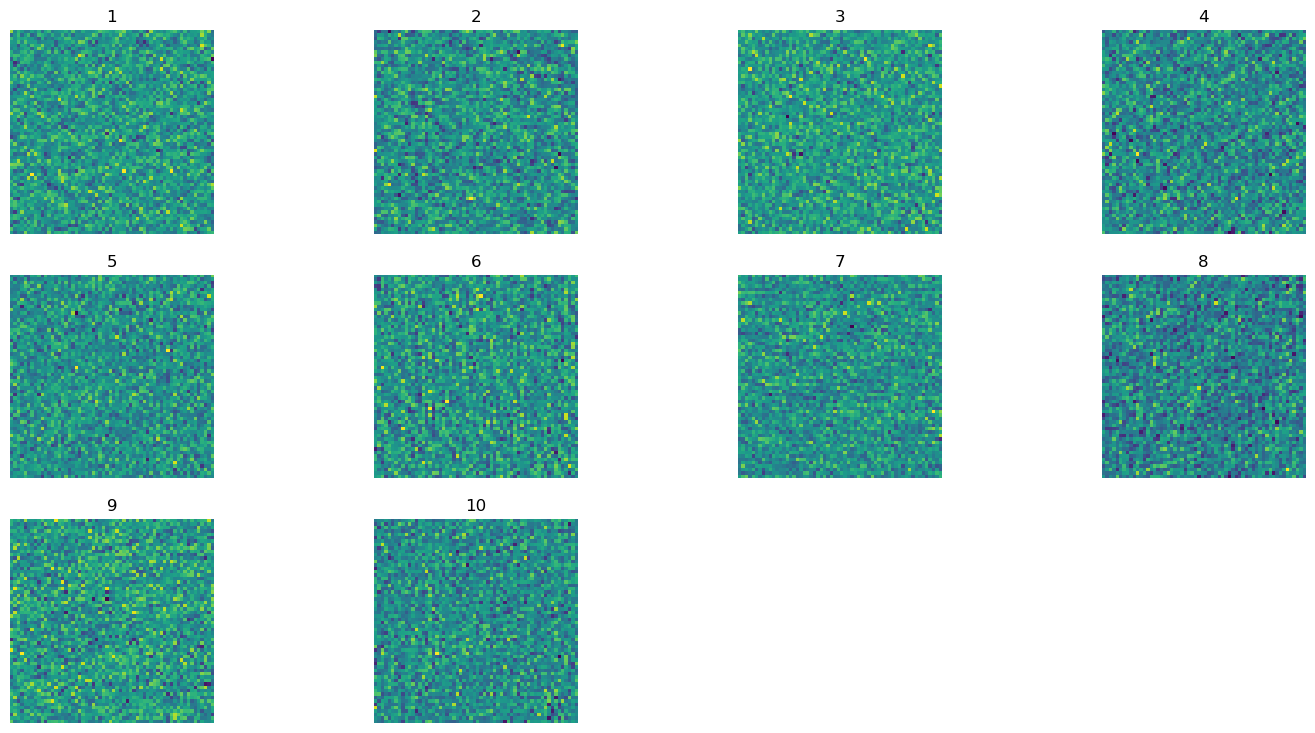

kernel size = 5, stride = 2, padding = 0


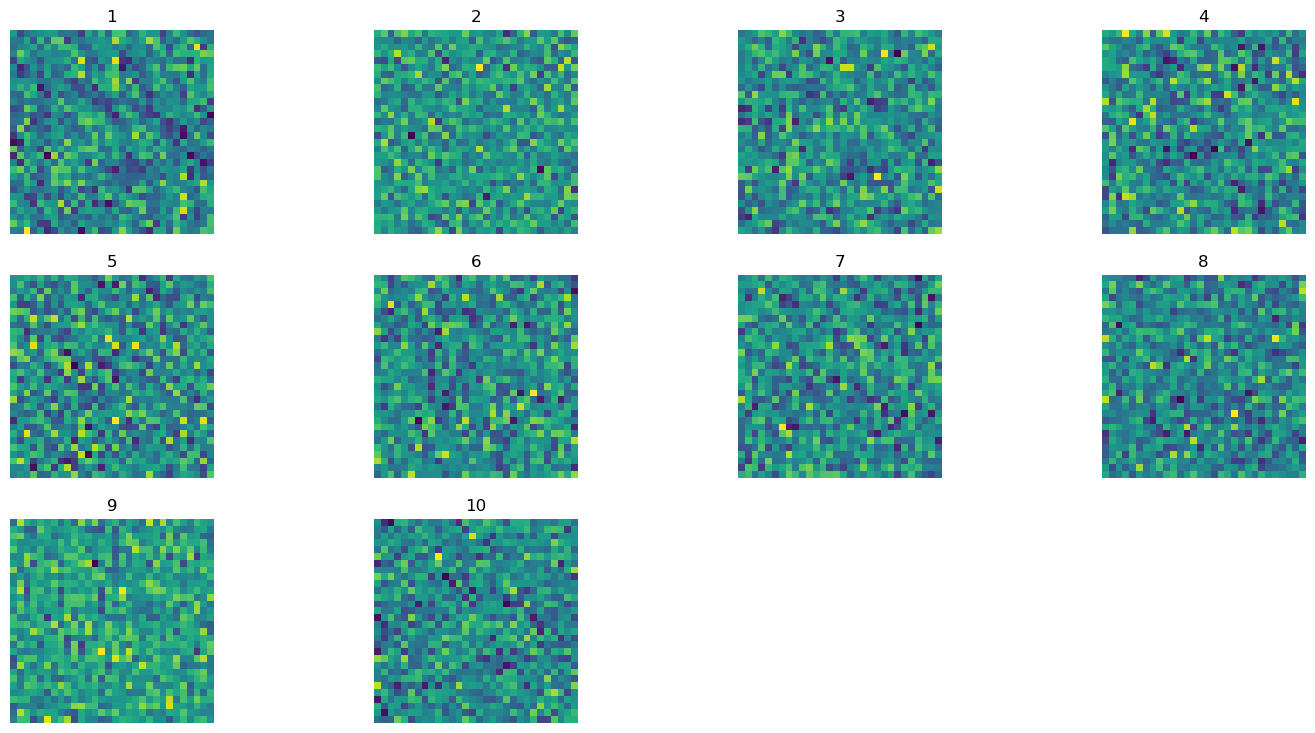

kernel size = 5, stride = 2, padding = 1


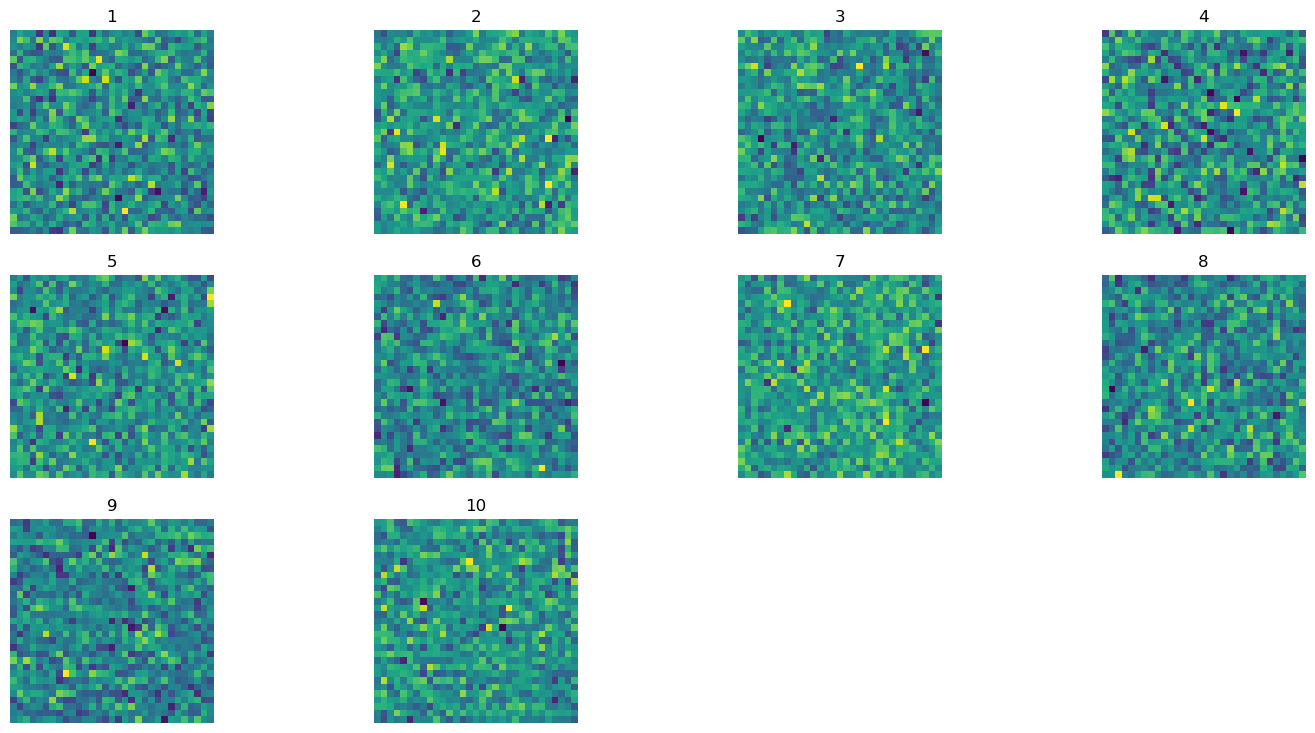

kernel size = 5, stride = 2, padding = 2


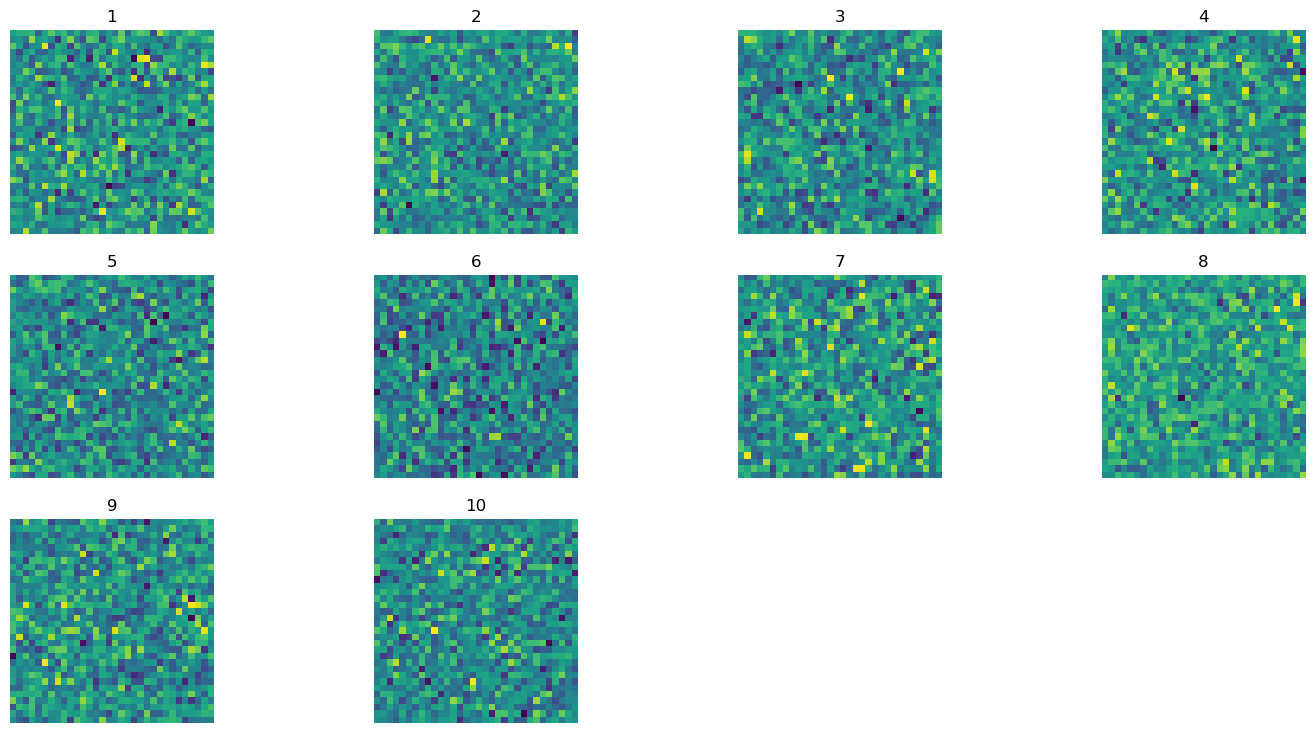

kernel size = 5, stride = 3, padding = 0


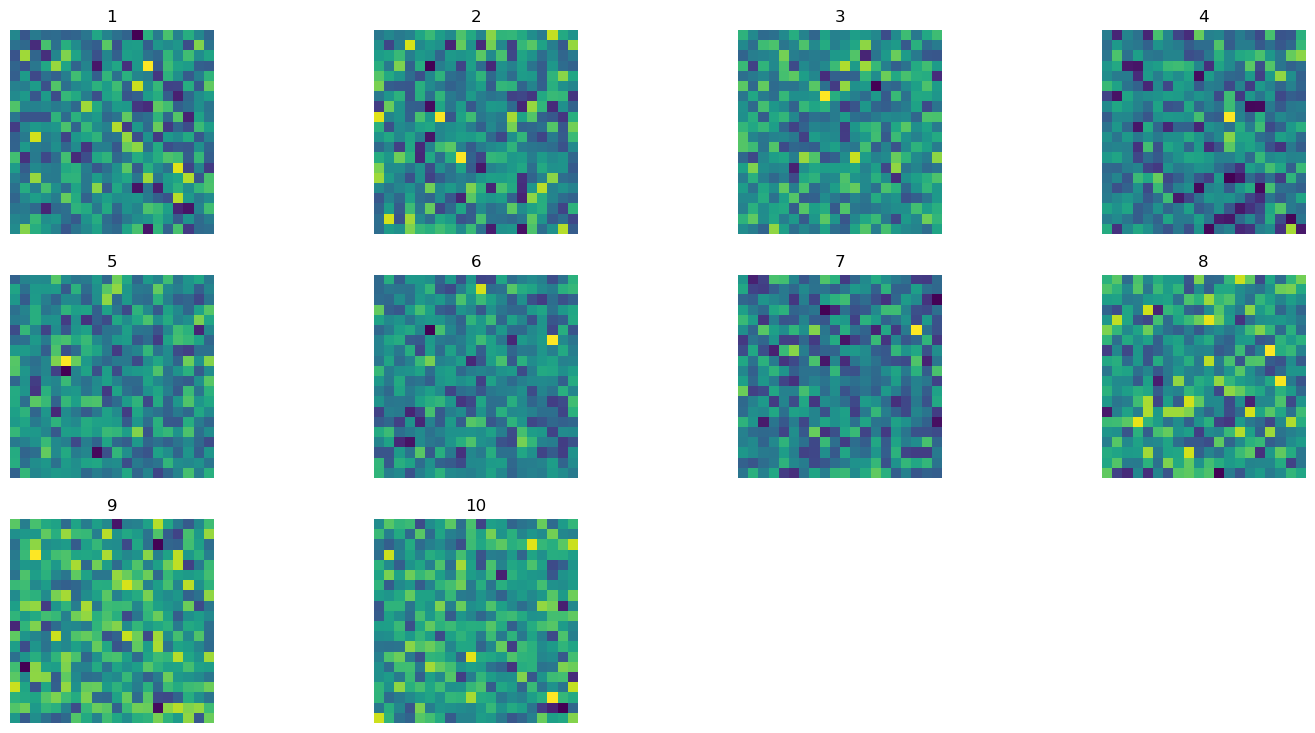

kernel size = 5, stride = 3, padding = 1


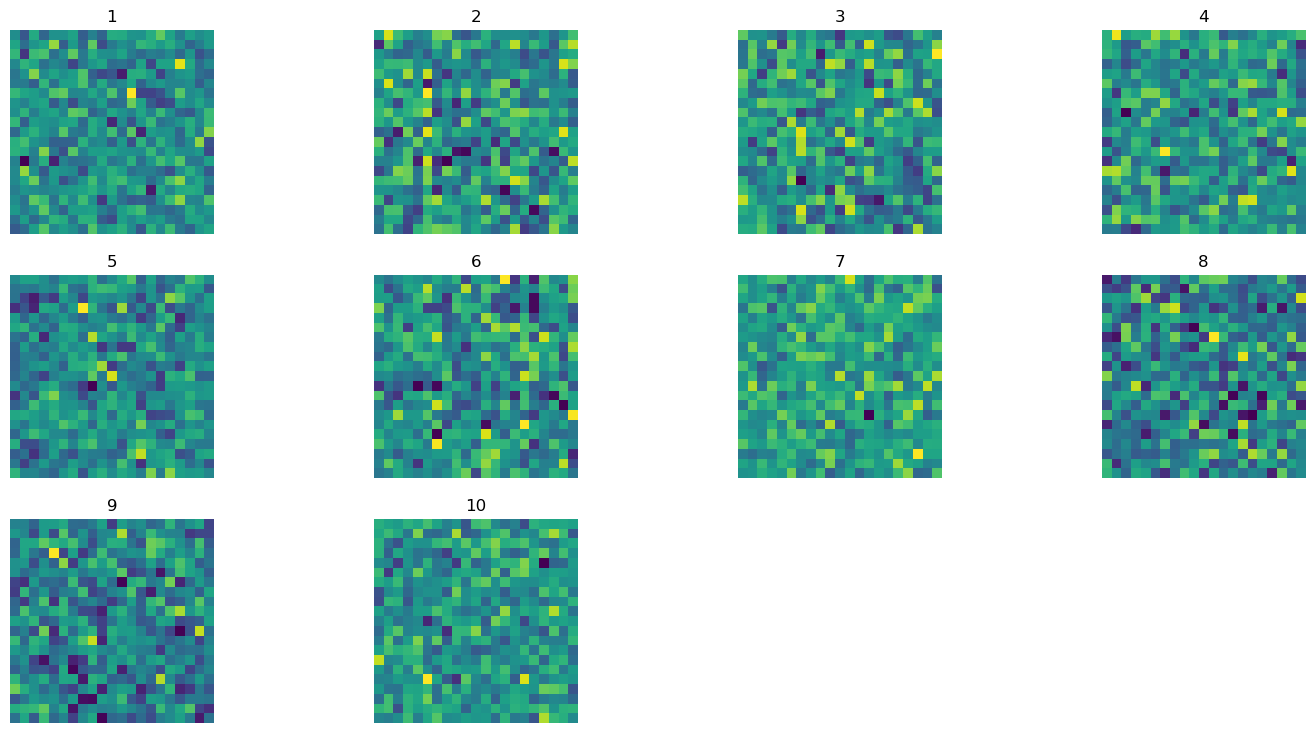

kernel size = 5, stride = 3, padding = 2


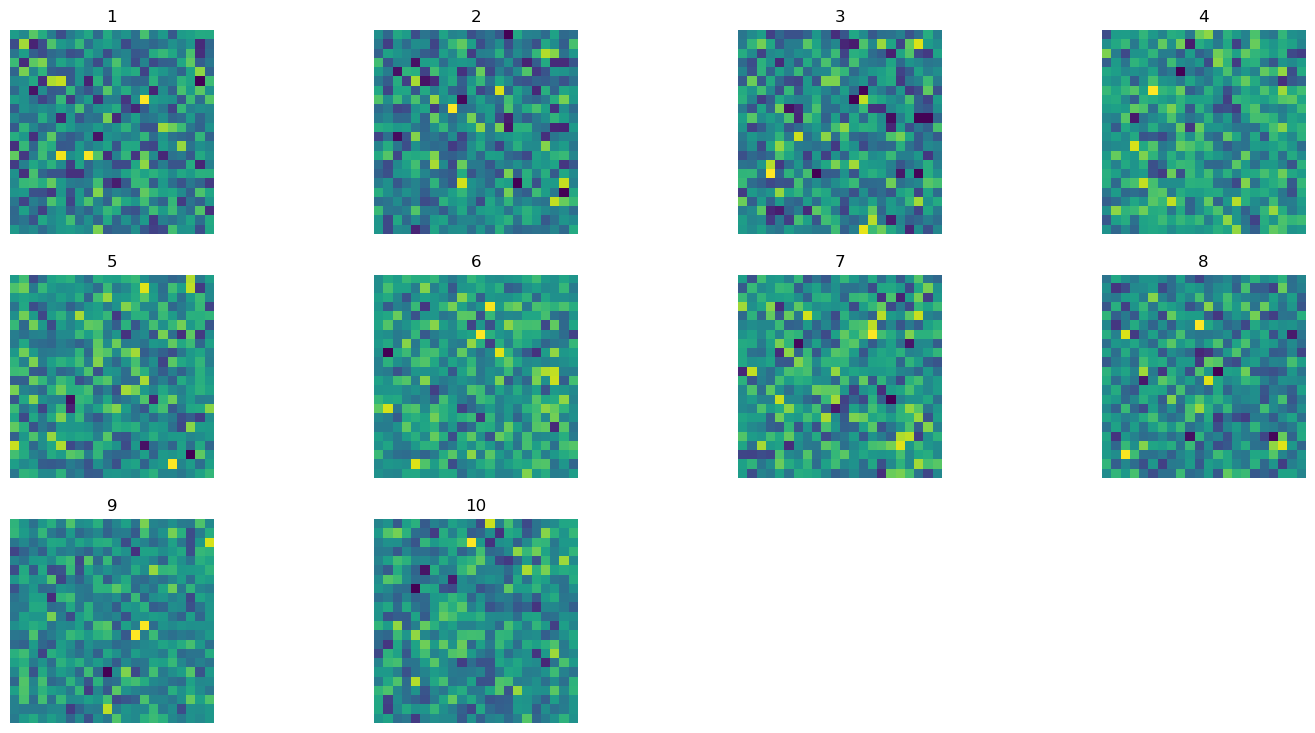

In [44]:
for ker_size in [2, 3, 5]:
    for stride_size in [1, 2, 3]:
        for padding_type in [0,1,2,"same","valid"] if stride_size == 1 else [0,1,2]:
            conv_layer = nn.Conv2d(in_channels=3,
                            out_channels=10,
                            kernel_size=ker_size,
                            stride=stride_size,
                            padding=padding_type)
            output = conv_layer(test_image.unsqueeze(0)).detach()
            print(f"kernel size = {ker_size}, stride = {stride_size}, padding = {padding_type}")
            show(output)

In [45]:
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        return self.classifier(self.block_2(self.block_1(x)))

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [46]:
# Create a random 2D tensor of shape (1, 1, 4, 4)
input_tensor = torch.rand(1, 1, 4, 4)

# Define a max pooling layer with a kernel size of (2, 2)
maxpool_layer = nn.MaxPool2d(kernel_size=(2, 2))

# Apply the max pooling layer to the input tensor
output_tensor = maxpool_layer(input_tensor)

# Print the input and output tensor shapes
print("Input shape:", input_tensor.shape)
print("Output shape:", output_tensor.shape)

Input shape: torch.Size([1, 1, 4, 4])
Output shape: torch.Size([1, 1, 2, 2])


In [47]:
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.2)
loss = torch.nn.CrossEntropyLoss()

In [48]:
torch.manual_seed(42)
train_time_start_on_cpu = timer()
for epoch in tqdm(range(EPOCH_COUNT)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_2.train()
        y_pred = torch.softmax(model_2(X), dim=1)
        loss_per_current_batch = loss(y_pred, y)
        # print(loss_per_current_batch)
        train_loss += loss_per_current_batch
        optimizer.zero_grad()
        loss_per_current_batch.backward()
        optimizer.step()
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    train_loss /= len(train_dataloader)
    ### Testing

    test_loss, test_acc = 0, 0 
    model_2.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_2(X)
            test_loss += loss(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
            
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 1.90351 | Test loss: 17.29900, Test acc: 59.11%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 1.80969 | Test loss: 17.77738, Test acc: 64.92%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 1.79934 | Test loss: 14.13295, Test acc: 66.13%

Epoch: 3
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 1.73749 | Test loss: 11.14894, Test acc: 74.41%

Epoch: 4
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 sampl

In [49]:
model_2_results = eval_model(model=model_2, data_loader=test_dataloader,
    loss_fn=torch.nn.CrossEntropyLoss(), accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 24.940210342407227,
 'model_acc': 75.98841853035144}